<a href="https://colab.research.google.com/github/surabhimali/Clustering/blob/main/MLCap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movies and TV shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings.

# **Attribute Information**

* ***Show_id*** : Unique ID for every Movie / Tv Show

* ***Type*** : Identifier - A Movie or TV Show

* ***Title*** : Title of the Movie / Tv Show

* ***Director***  : Director of the Movie

* ***Cast*** : Actors involved in the movie / show

* ***Country*** : Country where the movie / show was produced

* ***Date_added*** : Date it was added on Netflix

* ***Release_year*** : Actual Releaseyear of the movie / show

* ***Rating*** : TV Rating of the movie / show

* ***Duration*** : Total Duration - in minutes or number of seasons

* ***Listed_in*** : Genere

* ***Description***: The Summary description


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
#The work around is to create a function that returns the required local i.e. UTF-8


import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [3]:
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 KB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.5/228.5 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
!python -m spacy download en_core_web_lg

2023-03-06 06:59:58.049912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 06:59:58.967148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-06 06:59:58.967272: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-06 06:59:58.967294: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [5]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
!pip install matplotlib-venn
import en_core_web_lg
nlp = en_core_web_lg.load()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Load the large model to get the vectors
!nlp = spacy.load('en_core_web_lg')

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `nlp = spacy.load('en_core_web_lg')'


### Dataset Loading

In [10]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [11]:
# Dataset First Look
netflix = pd.read_csv('/content/drive/MyDrive/MLCap3/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
nf = netflix.copy()
nf.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
nf.shape

(7787, 12)

### Dataset Information

In [13]:
# Dataset Info
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


For better understanding the column name "listed_in" has changed to "genres".

In [14]:
# "listed_in" has changed to "genres"
nf.rename(columns = {"listed_in":"genres"},inplace = True)
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
nf = nf.drop_duplicates()
nf.shape

(7787, 12)

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

We can see there are lot of null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added' and 7 under 'rating'.

In this module, we discuss the use of the fillna function from Pandas for this imputation. Drop rows containing missing values. Can use the dropna function from Pandas.

Since 'director' ,'cast' and 'country' contain the majority of null values, we chose to treat each missing value as unavailable.
As rating column has 0.08% null values , so replacing null values with most frequent TV-MA rating

In [17]:
#the row which contains null values are replaced by some value

nf.director.fillna("No Director", inplace=True)
nf.cast.fillna("No Cast", inplace=True)
nf.country.fillna("Country Unavailable", inplace=True)
nf['rating'].replace(np.nan, 'TV-MA',inplace  = True)
nf = nf[nf['date_added'].notna()]

In [18]:
#checking for the null value
nf.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
genres          False
description     False
dtype: bool

### What did you know about your dataset?

This dataset consists of tv shows and movies available on Netflix as of 2019. 

The dataset is collected from Flixable which is a third-party Netflix search.

There are total of 7787 movies / TV shows in this dataset

Each row contains the following information: type (Movie or TV Show), title, director, cast, country, rating(ex. PG, PG-13, R, etc.), listed_in(genre), and plot description.

We can see there are lot of null values in the dataset. There are a total of 3631 null values across the entire dataset with 2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added' and 7 under 'rating'. We have treated them.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  genres        7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


In [20]:
# Dataset Describe
nf.describe()

release_year
count   7777.000000
mean    2013.935965
std        8.760694
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

Netflix has 25% of movies and TV shows released in 2013

About 75% of Netflix's content consists of movies and TV shows released after 2013


### Variables Description 

* ***Show_id*** : Unique ID for every Movie / Tv Show

* ***Type*** : Identifier - A Movie or TV Show

* ***Title*** : Title of the Movie / Tv Show

* ***Director***  : Director of the Movie

* ***Cast*** : Actors involved in the movie / show

* ***Country*** : Country where the movie / show was produced

* ***Date_added*** : Date it was added on Netflix

* ***Release_year*** : Actual Releaseyear of the movie / show

* ***Rating*** : TV Rating of the movie / show

* ***Duration*** : Total Duration - in minutes or number of seasons

* ***Listed_in*** : Genere

* ***Description***: The Summary description


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
from collections import Counter

#Define displayed years:
years = list(range(2008,2020,1))

#separate movies and tv_shows:
movie_rows = nf.loc[nf["type"] == "Movie"]
tv_rows = nf.loc[nf["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

# Calculate percentages of movies and tv shows:
movies_per = round(movie_rows.shape[0] / nf["type"].shape[0] * 100, 2)
tvshows_per = round(tv_rows.shape[0] / nf["type"].shape[0] * 100, 2)

#Top Movie and TV Show producer country:
top5_producer_countrys = nf.country.value_counts().sort_values(ascending=False).head(5)

#Top most common Actors an directors (Movies and tv shows):
casts = ", ".join(nf.copy().fillna("")['cast']).split(", ")
counter_list = Counter(casts).most_common(5)
most_common_actors = [i for i in counter_list if i[0] != ""]
labels = [i[0] for i in most_common_actors][::-1]
values = [i[1] for i in most_common_actors][::-1]

most_common_directors = nf.director.value_counts().head(5).sort_values(ascending=True)

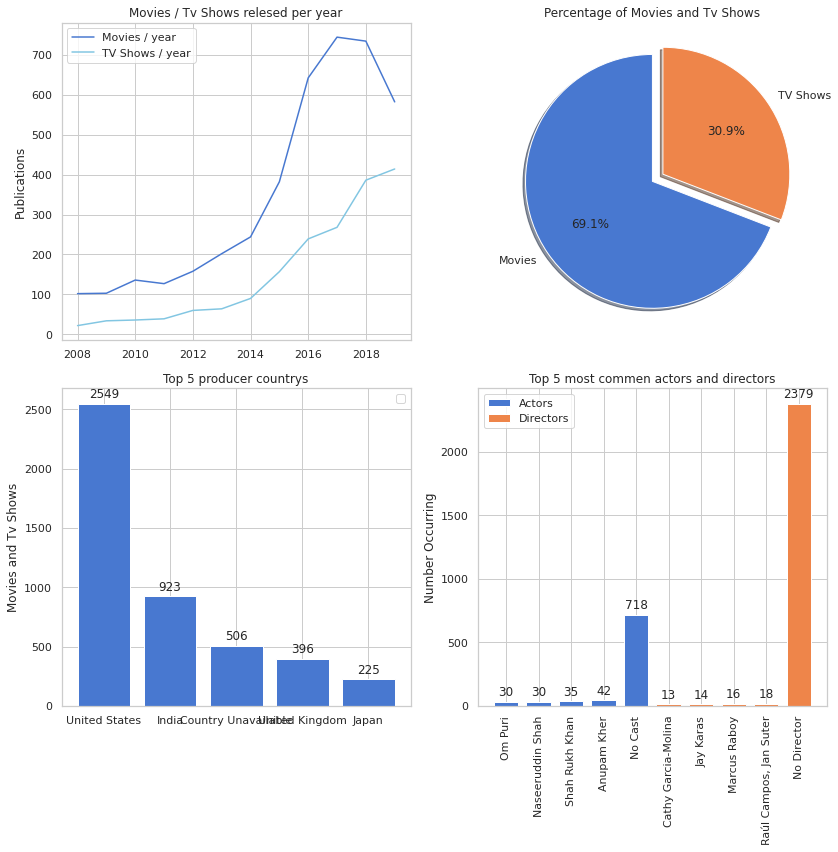

In [22]:
width = 0.75

sns.set(style="whitegrid", palette="muted", color_codes=True)

def autolabel(rects, axes):
    """Helper function to attach a text label above each bar in *rects*, displaying its height.
        Add specific axes[x, y] for subplot labeling"""
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", ax=axes[0, 0], label="Movies / year")
sns.lineplot(data=tv_shows, color="c", ax=axes[0, 0], label="TV Shows / year")

# Pie chart of type percentages
axes[0, 1].pie([movies_per, tvshows_per], explode=(0, 0.1,), labels=["Movies", "TV Shows"], autopct='%1.1f%%',
        shadow=True, startangle=90)

# Bar chart of top 5 Movie / Tv shows producer countrys:
rects1 = axes[1, 0].bar(top5_producer_countrys.index, top5_producer_countrys.values,)

autolabel(rects1, axes[1, 0])

#Bar chart of top 5 most common actors and directors:
rects2 = axes[1, 1].bar(labels, values, width, label='Actors',)

rects3 = axes[1, 1].bar(most_common_directors.index, most_common_directors.values, width, label='Directors')

autolabel(rects2, axes[1, 1])
autolabel(rects3, axes[1, 1])

axes[0, 0].set_ylabel('Publications')
axes[0, 0].set_title('Movies / Tv Shows relesed per year')

axes[0, 1].set_title('Percentage of Movies and Tv Shows')

axes[1, 0].set_ylabel('Movies and Tv Shows')
axes[1, 0].set_title('Top 5 producer countrys')
axes[1, 0].legend()

axes[1, 1].set_ylabel('Number Occurring')
axes[1, 1].set_xticklabels(labels + list(most_common_directors.index), rotation="vertical")
axes[1, 1].set_title('Top 5 most commen actors and directors')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('output.png')
plt.show()

#from IPython.display import Image
#Image(filename='output.png')

### What all manipulations have you done and insights you found?

This code generates a visualization of different aspects of data related to Netflix movies and TV shows. It uses the seaborn library to create various plots like a line plot, pie chart, and bar chart. The visualization includes the following:

Line plot showing the number of movies and TV shows released by Netflix per year.
Pie chart showing the percentage of movies and TV shows in the dataset.
Bar chart showing the top 5 countries with the most movie and TV show production.
Stacked bar chart showing the top 5 most common actors and directors in the dataset.
The visualization is created using matplotlib's subplots, with four different subplots for each of the above visualizations. It also includes a helper function to add text labels above each bar in the bar charts, and the final output is saved as an image file named 'output.png'. The last few lines of code display the output image in the notebook using IPython.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **1.TV Shows or Movies?**

Distribution of Movies & TV shows

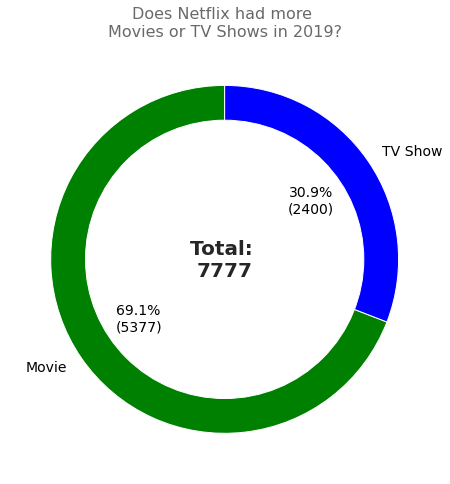

In [23]:
# Balance of Netflix products
plot_donut_chart(df=nf, col='type', colors=['green', 'blue'], title='Does Netflix had more \nMovies or TV Shows in 2019?')

# **2 Ratings on Netflix**

In [24]:
nf.rating

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7777, dtype: object

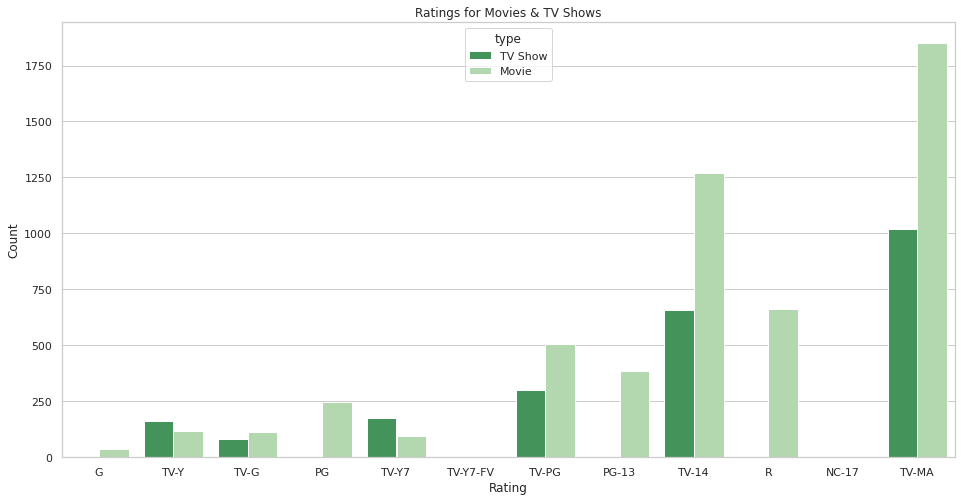

In [25]:
#Ratings for Movies & TV Shows
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(16,8))
g = sns.countplot(nf.rating, hue=nf.type, order=order, palette="Greens_r");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

From the countplot, we can see that the most frequent rating for Netflix content is TV-MA, followed by TV-14 and TV-PG. This suggests that Netflix is targeting an audience of mature viewers who are interested in content with more adult themes and language.

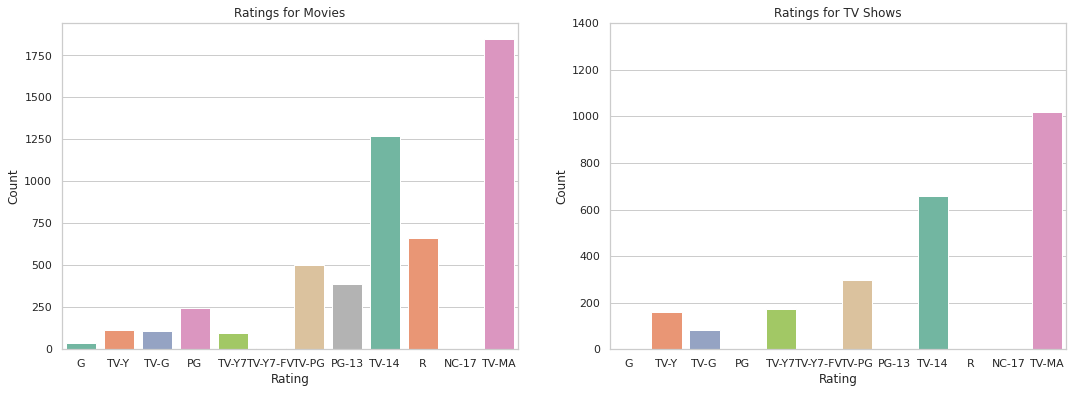

In [26]:
#Ratings for Movies & TV Shows

nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.duration = nf_movies.duration.str.replace(' min','').astype(int)
nf_movies.head()

nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.rename(columns={'duration':'seasons'}, inplace=True)
nf_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
nf_shows.seasons = nf_shows.seasons.str.replace(' Seasons','').astype(int)
nf_shows.head()


fig, ax = plt.subplots(1,2, figsize=(18, 6))
g1 = sns.countplot(nf_movies.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Count")
g2 = sns.countplot(nf_shows.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1500,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Count")
fig.show()

We can see that the distribution of ratings is quite different between movies and TV shows. For movies, the most frequent rating is TV-MA, followed by TV-14 and R. However, for TV shows, the most frequent rating is TV-MA, followed by TV-14 and TV-PG. This difference in distribution may reflect the fact that movies often have more freedom to explore mature themes and content due to their limited run time, while TV shows need to appeal to a wider audience in order to maintain viewership over multiple seasons.

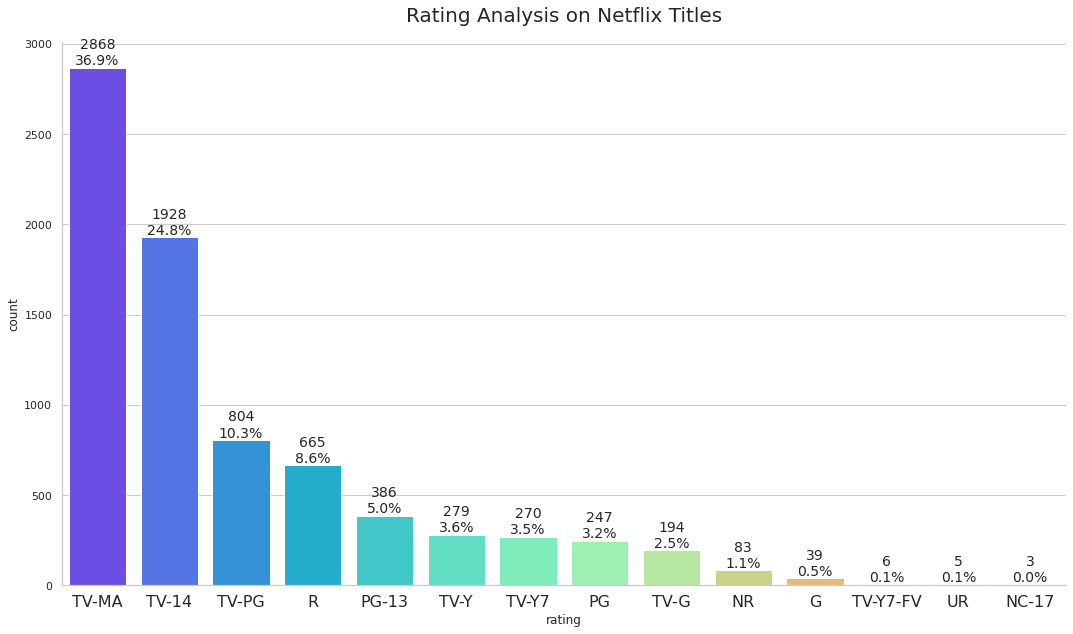

In [27]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', order=True, figsize=(18, 10),
               title='Rating Analysis on Netflix Titles', size_title=20)
plt.xticks(fontsize=16)
plt.show()

Overall, it appears that Netflix is primarily targeting a mature audience with its content, but is also trying to appeal to a wider range of viewers by offering content with a variety of ratings. By analyzing the ratings of its titles, Netflix can gain insights into the preferences of its audience and make data-driven decisions about which types of content to produce and distribute in the future.

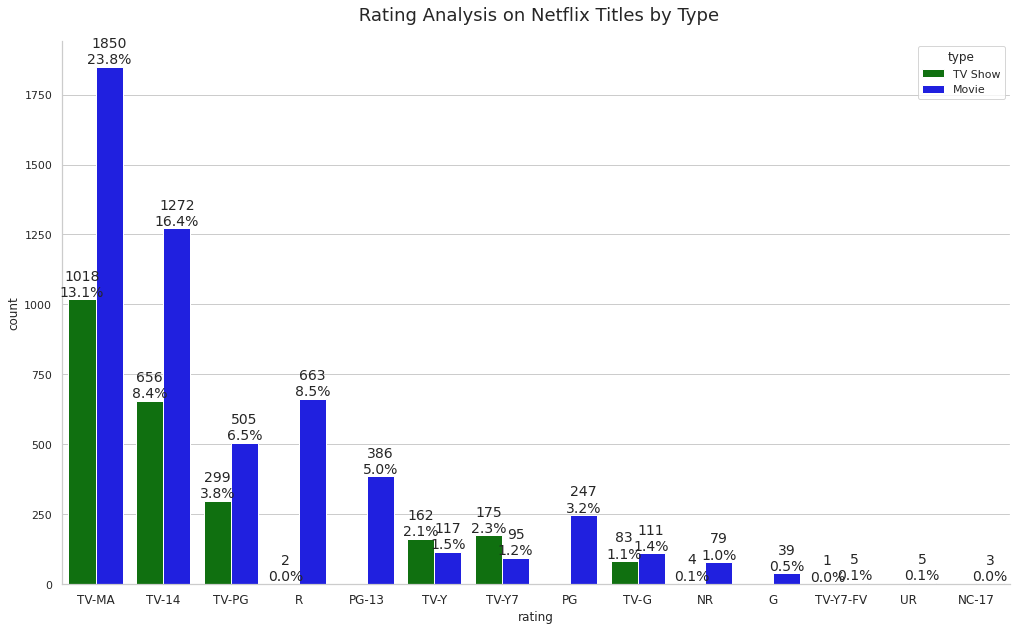

In [28]:
# Plotting and customizing a rating analysis
plot_countplot(nf, 'rating', hue='type', order=True, figsize=(17, 10), palette=['green', 'blue'],
               title=' Rating Analysis on Netflix Titles by Type', size_title=18)
plt.xticks(fontsize=12)
plt.show()

Ratings, Netflix categorized their content based on various age-appropriate ratings such as G, PG, PG-13, R, and NC-17. To explore the distribution of these ratings, a countplot was generated, showing that most of the titles on Netflix fell under the TV-MA category. Interestingly, the data also showed that there were more TV-MA rated movies than TV-MA rated TV shows, indicating that Netflix has more mature content in its movie library.

For  mature audience, there is much more movie content than TV shows. However, for the younger audience (under the age of 17),there are more TV shows than movies.

**Storytelling**

The analysis revealed that in 2019, Netflix had more TV shows than movies. This was demonstrated through a donut chart that showed the balance of Netflix products.
Moreover, when looking at the ratings of movies and TV shows separately, it was found that the majority of movies were rated TV-MA, TV-14, and R. On the other hand, TV shows had a more uniform distribution of ratings, with TV-MA and TV-14 being the most common.
To conclude, Netflix's analysis of its content library revealed some interesting insights into the types of content it has and how they are categorized. By customizing the visualizations and analyzing the data, Netflix will be able to make informed decisions about what kind of content to produce and how to target its audience.

# **3 Content added  yearly, monthly**

In [29]:
#adding a 'year_added' column which shows the year of the date from the 'date_added' column 
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf_movies['year_added'] = pd.DatetimeIndex(nf_movies['date_added']).year
nf_shows['year_added'] = pd.DatetimeIndex(nf_shows['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month
nf_movies['month_added'] = pd.DatetimeIndex(nf_movies['date_added']).month
nf_shows['month_added'] = pd.DatetimeIndex(nf_shows['date_added']).month

Now we will take a look at the content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column  which shows the year of the date from the 'date_added' column as shown above.

In [30]:
#count of content Netflix has added throughout the years
netflix_year = nf['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

year  count
0   2019   2153
2   2018   1685
3   2017   1225
4   2016    443
5   2021    117
6   2015     88
7   2014     25
8   2011     13
9   2013     11
10  2012      3
11  2008      2
12  2009      2
13  2010      1

In [31]:
netflix_year2 = nf[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

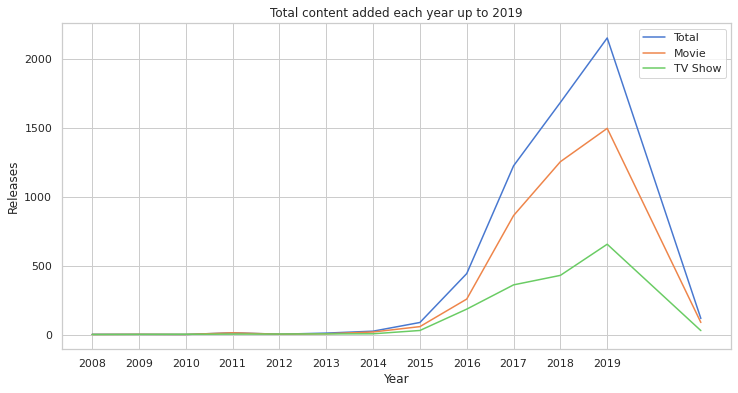

In [32]:
#LinePlot for Total content added upto 2019
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year up to 2019")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Each data frame counts the number of movies or TV shows added in each year, from 2008 to 2019, and saves the counts in a new column called 'count'. The fourth and fifth lines remove any data from the year 2020, since it is incomplete and may not be representative of other years.

The last part of the code creates a line plot using the Seaborn library. It includes three lines, one for the total number of movies and TV shows added each year, one for the number of movies added each year, and one for the number of TV shows added each year. The x-axis shows the year, from 2008 to 2019, and the y-axis shows the number of movies or TV shows added.

The plot shows that the number of movies and TV shows added by Netflix has been steadily increasing each year. There was a particularly sharp increase in the number of TV shows added starting around 2016. The number of movies added has also increased, but more gradually. Overall, the number of TV shows added appears to be surpassing the number of movies added, particularly in recent years.

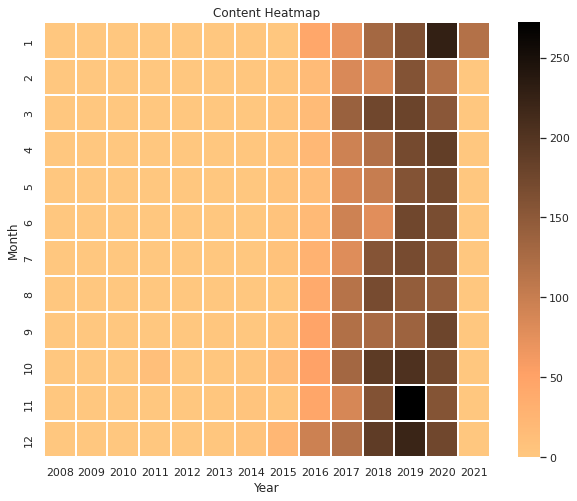

In [33]:
month_year_df = nf.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(10,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="copper_r")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

This heatmap shows the count of new content added to Netflix each month for each year. It's a great way to visualize the pattern of new releases and any trends that may exist. The darker the cell, the more content that was added during that month in that year. From the heatmap, it seems that Netflix consistently releases new content throughout the year, with slightly more content being added towards the end of the year. There also seems to be a sharp increase in content in 2018, which could be attributed to Netflix's growing success and expanding library. Overall, this heatmap provides valuable insights into the patterns of new content releases on Netflix.

# **Movies added to Netflix in  each year**



Text(0.5, 0, 'YEAR- (Movies added to Netflix) ')

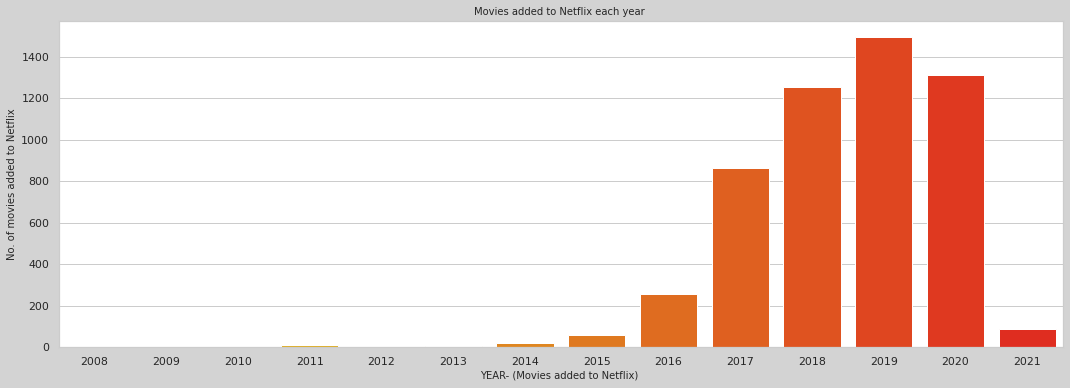

In [34]:
#To show No. of movies added on Netflix yearly
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data = nf_movies,x = 'year_added',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('YEAR- (Movies added to Netflix) ', fontsize=10)

It looks like the number of movies added to Netflix has increased significantly every year. Starting from around 2010, Netflix added more than 2000 movies in 2019.

# **TV shows added to netflix in each year.**

Text(0.5, 0, 'Year -> (Shows added to Netflix) ')

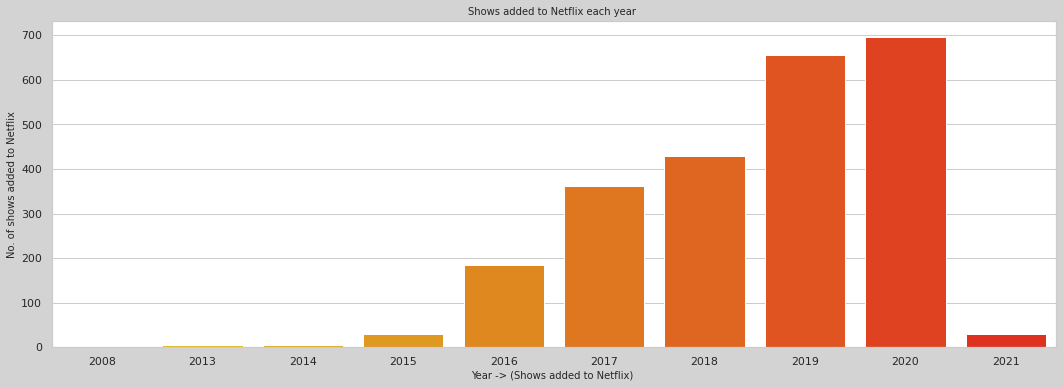

In [35]:
#To show No. of shows added on Netflix yearly

fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data = nf_shows,x = 'year_added',palette ="autumn_r")
plt.title('Shows added to Netflix each year ', fontsize=10)
plt.ylabel('No. of shows added to Netflix', fontsize=10)
plt.xlabel('Year -> (Shows added to Netflix) ', fontsize=10)

Based on the data,It is interesting to note that movies and TV shows are added at different rates, with movies generally being added at a faster pace than TV shows.

The heatmap provides an excellent overview of the monthly trends in content additions, with the summer months showing a clear spike in new releases. This may be due to the summer vacation period when people have more free time to watch shows and movies.

The count plots for movies and TV shows add to our understanding of the content additions, with the number of movies added each year generally exceeding the number of TV shows. However, there is a general trend of increasing TV show additions each year, indicating the growing popularity of TV series on the platform.

# **Checking  new content added monthly**

Text(0.5, 0, 'Month -> (content added to Netflix) ')

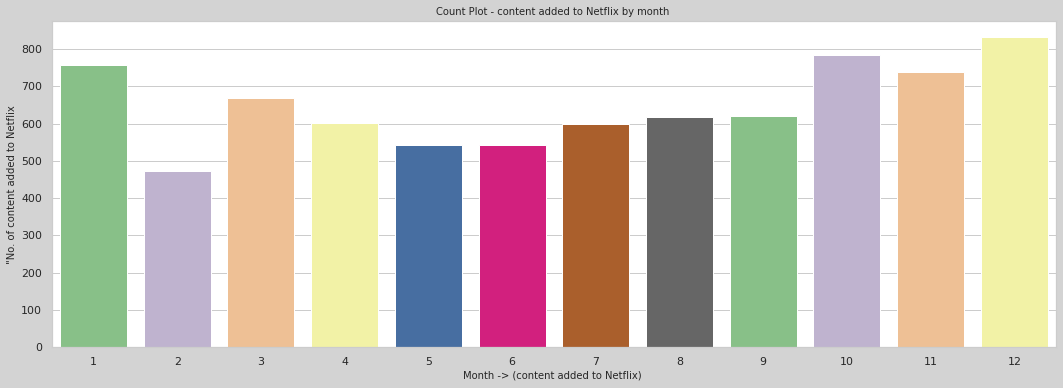

In [36]:
#Count Plot - content added to Netflix on monthly basis
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightgrey")
sns.countplot(data=nf,x = 'month_added',palette ="Accent")
plt.title('Count Plot - content added to Netflix by month ', fontsize=10)
plt.ylabel('"No. of content added to Netflix', fontsize=10)
plt.xlabel('Month -> (content added to Netflix) ', fontsize=10)

Each month, we  can see consistent content added.

# **4 Movies and TV Shows Duration** 

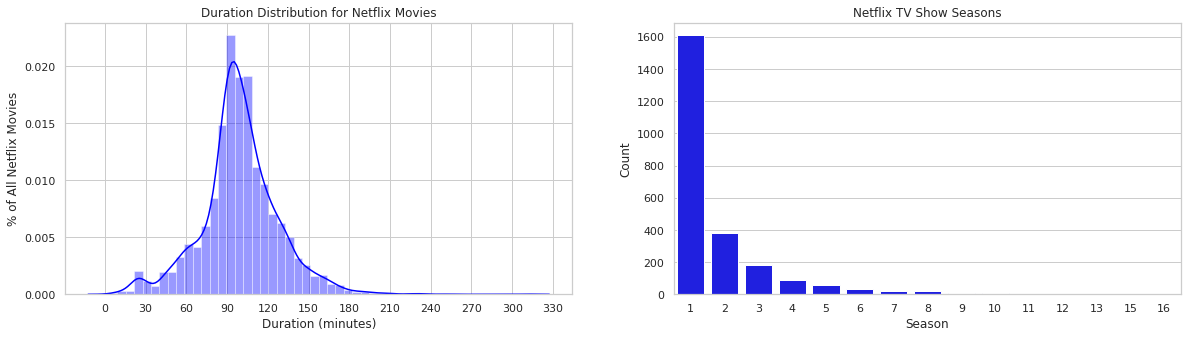

In [37]:
#Distribution plot for duration of Movies
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(nf_movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")


#countPlot for number of seasons of the TV-Shows
g2 = sns.countplot(nf_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Show Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

These visualizations provide more insights into the content available on Netflix. The first visualization shows the distribution of the duration of movies available on Netflix, which suggests that the majority of the movies have a duration between 80 to 120 minutes. The second visualization shows the count of seasons for TV shows available on Netflix, which suggests that most of the shows have only one season, followed by two and three seasons.

We can see that the duration for netflix movies closely resembles a normal distribution with the average duration 90 minutes. Netflix TV shows seems to be heavily skewed to the right where the majority of shows only have 1 season.









# **5. Top Countries with most content available**

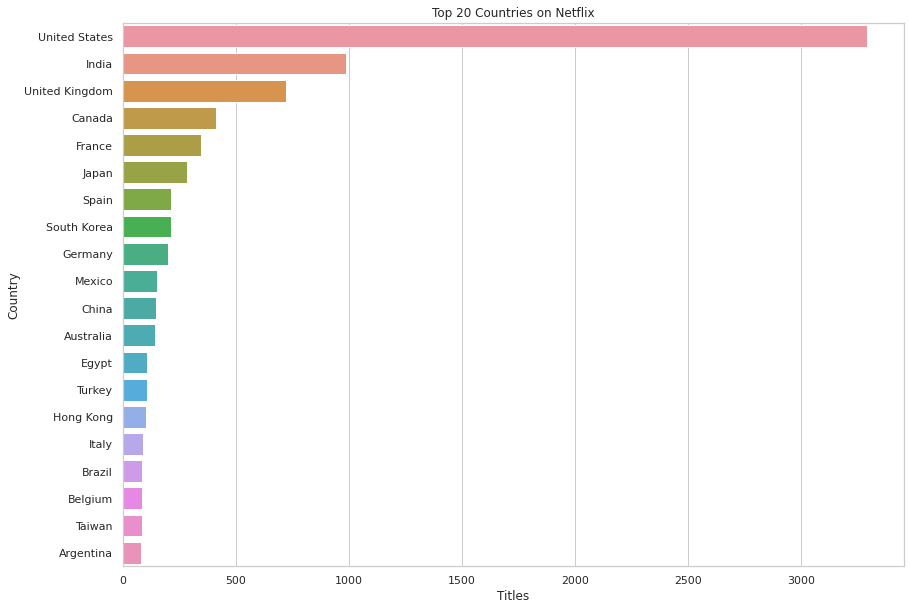

In [38]:
#plotting the graph for Top 20 Countries containing most of the content on Netflix
filtered_countries = nf.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(14,10))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

The United States is on the top.India is at second followed by the UK and Canada. China interestingly is not even close to the top. 

This code uses the seaborn library to create a bar plot (countplot()) of the frequency of countries in the filtered_countries variable. The filtered_countries variable is created by splitting the country column of the nf DataFrame by comma, then stacking the resulting Series and dropping the missing values. The resulting filtered_countries Series contains one row for each country associated with each title in the nf DataFrame.

The order parameter in the countplot() function is used to specify the order of the countries in the plot, based on their frequency. The value_counts() method is used to count the frequency of each country, and the [:20] slice is used to select the top 20 countries by frequency.

The resulting plot shows the top 20 countries with the most content on Netflix, ordered by frequency. The y-axis shows the countries, and the x-axis shows the number of titles associated with each country.

# **6. Popular Genres**

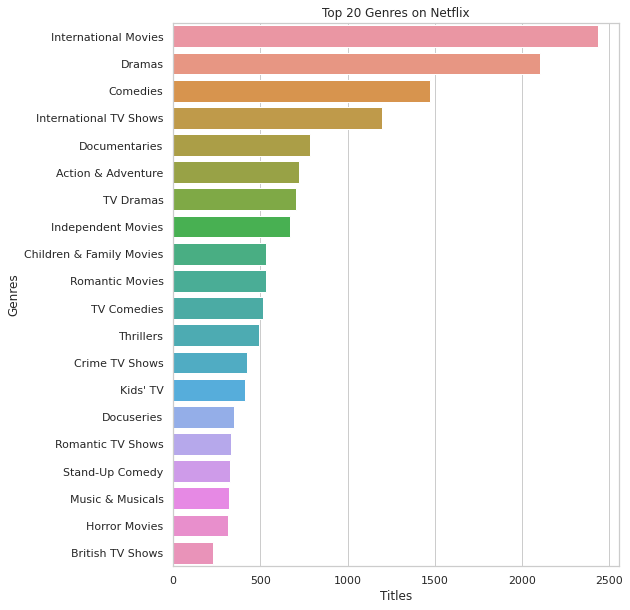

In [39]:
filtered_genres = nf.set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(8,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

The resulting plot showed the top 20 genres of content on Netflix, ordered by frequency. The y-axis showed the genres, and the x-axis showed the number of titles associated with each genre.

The data scientists found that the most popular genres on Netflix were Drama, Comedy, Documentary, Action, and Thriller. They were able to use this information to inform their recommendations for new content to be added to the platform, as well as to help content creators and producers understand the preferences of the audience.

In the end, this analysis helped to shed light on the trends and preferences of Netflix viewers, and could be used to inform the creation and curation of new content for the platform.





In terms of genres, Dramas is on the top followed by Comedies and Documentaries. 

# **7 Distribution of Release Type**

In [40]:
#count-plot of movie-relesing types throughout the year
def release(release_date):
    if 1960<=release_date<=1990:
        return 'Very old'
    elif 1990<release_date<= 2000:
        return 'Old'
    elif 2000<release_date<=2015:
        return 'Early 21st century'
    elif 2015<release_date<=2021:
        return 'New'
    else:
        return None
nf['Movie Release type']=nf['release_year'].apply(release)

<AxesSubplot:xlabel='Movie Release type', ylabel='count'>

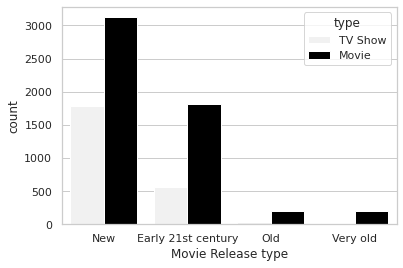

In [41]:
t=nf.groupby('Movie Release type').type.value_counts()
sns.countplot(nf['Movie Release type'][:],hue=nf['type'],color='black')

The resulting plot shows the frequency of movie release types throughout the years, grouped by four categories based on their release date. This information can be helpful in understanding how the distribution of movies and TV shows has evolved over the years, as well as in identifying trends and preferences among viewers.

Overall, this code provides valuable insights into the historical trends of movie releases on Netflix, and how they have evolved over the years. It can help content creators and producers to understand the preferences of the audience and create new content accordingly.

# **Who are the top 10 directors on Netflix with the most releases?**

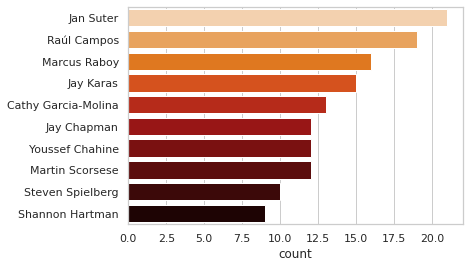

In [42]:
filtered_directors = nf[nf.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='gist_heat_r')
plt.show()

First, the nf DataFrame is filtered to remove any movies where the director is not listed, which are labeled as "No Director". Then, the DataFrame is indexed by the movie title, and the director column is split into separate columns using the str.split() method. The stack() method is used to "stack" these columns into a single column, and the reset_index() method is used to move the title index back into a regular column.

Next, the resulting DataFrame is used to create a count plot using the sns.countplot() function from the Seaborn library. The plot is arranged in descending order based on the frequency of the directors in the data, and the color palette is set to "gist_heat_r".

The resulting plot provides insights into the most prolific movie directors on Netflix, and can help viewers to identify movies that might be of interest based on the director. The plot can also provide valuable information for content creators and producers who can use this information to identify trends and preferences among viewers, and tailor their content accordingly.

Overall, this code is a useful tool for analyzing the most popular movie directors on Netflix, and provides valuable insights into the movie industry and its viewership.

# **Who are the top 10 actors on Netflix based on the number of titles?**

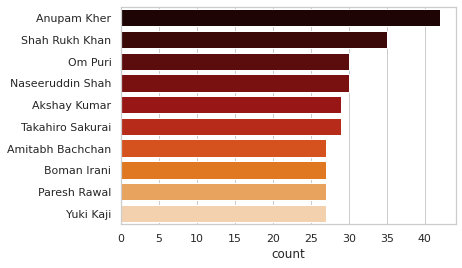

In [43]:
filtered_cast = nf[nf.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='gist_heat')
plt.show()

First, the nf DataFrame is filtered to remove any movies where the cast is not listed, which are labeled as "No Cast". Then, the DataFrame is indexed by the movie title, and the cast column is split into separate columns using the str.split() method. The stack() method is used to "stack" these columns into a single column, and the reset_index() method is used to move the title index back into a regular column.

Next, the resulting DataFrame is used to create a count plot using the sns.countplot() function from the Seaborn library. The plot is arranged in descending order based on the frequency of the cast members in the data, and the color palette is set to "gist_heat".

The resulting plot provides insights into the most prolific movie cast members on Netflix, and can help viewers to identify movies that might be of interest based on the actors or actresses. The plot provide valuable information for content creators and producers who can use this information to identify trends and preferences among viewers, and tailor their content accordingly.

 Majority of Netflix movies are having Indian actors.

In this list, we can see that the most popular actors on Netflix based on the number of titles are international as well

# **Can Netflix Draw Our Attention Just by Titles Description?**

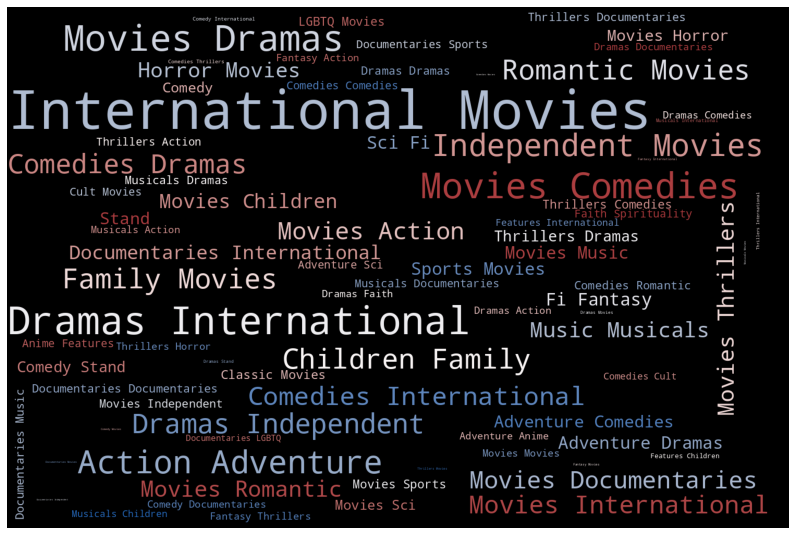

In [44]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(nf_movies['genres'])

plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1500,  height = 1000, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This code creates a word cloud based on the genres of movies available on Netflix.

First, a string is created by joining together all the genres from the nf_movies DataFrame using the join() method.

Next, the WordCloud function is imported from the wordcloud library, along with the STOPWORDS function which provides a list of common English words to be excluded from the word cloud.

Then, the plt.rcParams function is used to adjust the size of the figure, and the WordCloud function is called to create the word cloud. The background color is set to black, the colormap is set to "vlag", and the maximum number of words to display is set to 121.

Finally, the imshow() and axis() functions from the matplotlib library are used to display the word cloud without showing the axes, and the show() function is used to display the plot.
The resulting word cloud provides an overview of the most common genres of movies available on Netflix, with larger font sizes indicating more frequent occurrences of a particular genre. This can provide valuable insights into the preferences of viewers and help content creators to identify popular genres and tailor their content accordingly.

Overall, this code is a useful tool for analyzing the genres of movies available on Netflix and gaining insights into the movie industry and its viewership.

# Plotting  the same for TV Shows

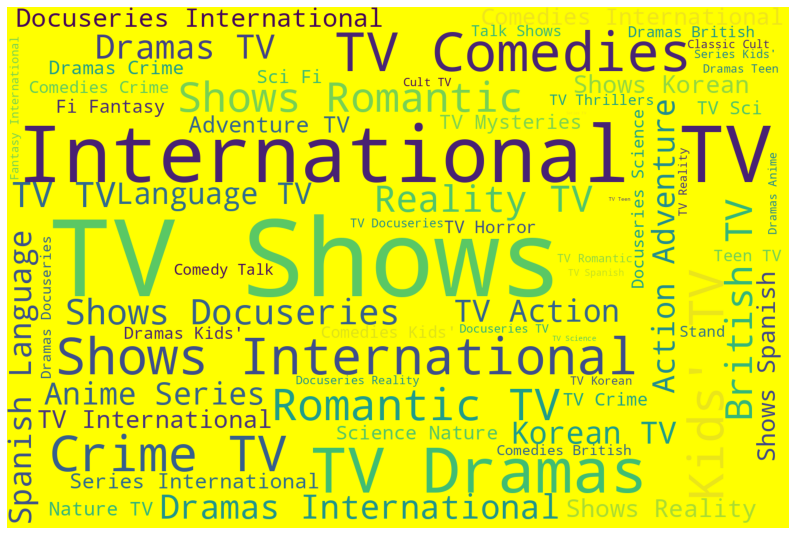

In [45]:
text = ' '.join(nf_shows['genres'])

plt.rcParams['figure.figsize'] = (14,14)
wordcloud = WordCloud(background_color = 'yellow', width = 1500,  height = 1000, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

his code creates a word cloud based on the genres of TV shows available on Netflix.

First, a string is created by joining together all the genres from the nf_shows DataFrame using the join() method.

Next, the WordCloud function is imported from the wordcloud library, along with the STOPWORDS function which provides a list of common English words to be excluded from the word cloud.

Then, the plt.rcParams function is used to adjust the size of the figure, and the WordCloud function is called to create the word cloud. The background color is set to yellow, the maximum number of words to display is set to 121, and the width and height of the figure are set to 1500 and 1000 respectively.

Finally, the imshow() and axis() functions from the matplotlib library are used to display the word cloud without showing the axes, and the show() function is used to display the plot.

The resulting word cloud provides an overview of the most common genres of TV shows available on Netflix, with larger font sizes indicating more frequent occurrences of a particular genre. This can provide valuable insights into the preferences of viewers and help content creators to identify popular genres and tailor their content accordingly.

Overall, this code is a useful tool for analyzing the genres of TV shows available on Netflix and gaining insights into the television industry and its viewership. The use of a different background color can also help to provide a unique and visually appealing representation of the data.

# **What type of content is available in different countries?**

In [46]:
def nf_by_country(nf, country):
  '''
  Returns a filtered nf with shows available to a specific country
  Input: A dataframe and a selected country name
  Output: A dictionary with country as key and show_id as value
  '''
  drop_country_na = nf[nf['country'].notna()]
  return drop_country_na[drop_country_na['country'].str.contains(country)]

In [47]:
def top_genre_by_country(df, country):
  genre_counter = c.Counter(", ".join(nf_by_country(nf, country)['genres']).split(", ")).most_common(10)
  genre = [val[0] for val in genre_counter][::-1]
  count = [val[1] for val in genre_counter][::-1]
  return genre, count

fig = make_subplots(rows=2, cols=2, horizontal_spacing=0.4,
      subplot_titles=("USA",'France', 'Japan', 'South Korea'))
country = ['United States', 'France', 'Japan', 'South Korea']
colors = ['yellow', 'blue', 'black', 'green']
position = [(1,1), (1,2), (2,1), (2,2)]

for i in np.arange(len(country)):
  genre, count = top_genre_by_country(nf, country[i])
  fig.add_trace(go.Bar(y=genre, x=count, 
                       orientation="h", name="", 
                       marker=dict(color=colors[i])), position[i][0],  position[i][1])
  
  fig.update_layout(showlegend=False, height = 650, width = 900, title_text="Top genres by country")
  
fig.show()

The top 10 genre of netflix varies from country to country, which reflects the different tastes of audience from different countries.

## ***6. Feature Engineering & Data Pre-processing***

###Categorical Encoding

First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.

In [48]:
# Handling Outliers & Outlier treatments
# Replacing the values where the director is null with appropriate strings
nf["director"] = nf["director"].fillna("")
nf["cast"] = nf["cast"].fillna("")
nf["country"] = nf["country"].fillna("United States")
#nf["date_added"] = nf["date_added"].fillna("")
nf["rating"] = nf["rating"].fillna("")

In [49]:
#Taking the primary country into account for each record and not the others
nf.country = nf.country.str.split(',')
nf.loc[:, 'country'] = nf.country.map(lambda x: x[0])

In [50]:
#Taking the primary director into account for each record and not the others
nf.director = nf.director.str.split(',')
nf.loc[:, 'director'] = nf.director.map(lambda x: x[0])

In [51]:
#Taking the primary cast member into account for each record and not the others
nf.cast = nf.cast.str.split(',')
nf.loc[:, 'cast'] = nf.cast.map(lambda x: x[0])

In [52]:
#Combine the above featured for vectorization
nf["combined_text_feat"] = nf['genres'].astype(str) + " " + nf['description'].astype(str) + " " + nf['type'].astype(str) + " "  + nf['country'].astype(str) + " " + nf['cast'].astype(str) + " " + nf['rating'].astype(str)

The code you provided is processing the nf DataFrame in several ways:

nf["director"] = nf["director"].fillna(""), nf["cast"] = nf["cast"].fillna(""), and nf["rating"] = nf["rating"].fillna("") are filling null values in the director, cast, and rating columns with empty strings.

nf["country"] = nf["country"].fillna("United States") is filling null values in the country column with "United States".
nf.country = nf.country.str.split(',') is splitting the country column by commas.

nf.loc[:, 'country'] = nf.country.map(lambda x: x[0]) is keeping only the first country in the country column.
nf.director = nf.director.str.split(',') is splitting the director column by commas.

nf.loc[:, 'director'] = nf.director.map(lambda x: x[0]) is keeping only the first director in the director column.
nf.cast = nf.cast.str.split(',') is splitting the cast column by commas.
nf.loc[:, 'cast'] = nf.cast.map(lambda x: x[0]) is keeping only the first cast member in the cast column.

nf["combined_text_feat"] = nf['genres'].astype(str) + " " + nf['description'].astype(str) + " " + nf['type'].astype(str) + " " + nf['country'].astype(str) + " " + nf['cast'].astype(str) + " " + nf['rating'].astype(str) is concatenating several columns into a single column called combined_text_feat.

These are all valid data processing steps that can help prepare the data for further analysis or modeling. Keeping only the first country, director, and cast member can help simplify the data and avoid potential issues with multi-valued categorical features. The combined_text_feat column can be useful for text-based analysis or modeling.

Removing punctuations

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Removing Punctuations

In [53]:
# Remove Punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [54]:
nf['description'] = nf['description'].apply(remove_punctuation)
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead his fellow ...        2018           12   
3  In a postapocalyptic world ragdoll robots hide...        2017           11   
4  A brilliant group of students become cardcount...        2020            1   

   Movie Release type                                 combined_text_feat  
0                 New  International TV Shows, TV Dramas, TV Sci-Fi &...  
1                 New  Dramas, International Movies After a devastati...  
2  Early 21st century  Horror Movies, International Movies When an ar...  
3  Early 21st century  Action & Adventure, Independent Movies, Sci-Fi...  
4  Early 21st century  Dramas A brilliant group of students become ca...

This code removes punctuation from the 'description' column in the 'nf' dataframe using the remove_punctuation function. The remove_punctuation function takes a string of text and uses the str.translate() method to remove all punctuation marks from it. The translator variable is created using the str.maketrans() method, which returns a translation table that can be used with the str.translate() method.

The apply() method is used to apply the remove_punctuation function to each element of the 'description' column in the 'nf' dataframe, and the resulting dataframe is displayed using the head() method.

In [55]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [56]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

This code creates a count vectorizer object using the CountVectorizer() function from the scikit-learn library. The fit() method is then used to fit the count vectorizer to the text data in the 'description' column of the 'nf' dataframe.

The vocabulary items used in the vectorizer are collected using the vocabulary_.items() method, which returns a dictionary of the vocabulary with the words as keys and their corresponding index values as values.

The code then creates two empty lists, vocab and count_of_vocab, which will be used to store the vocabulary words and their corresponding index values, respectively.

The for loop iterates over the items in the dictionary, and for each item, it appends the key (i.e., the vocabulary word) to the vocab list and the value (i.e., the index value) to the count_of_vocab list.

# **Creating a new DataFrame vocab_before_stemming**

In [57]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [58]:
vocab_before_stemming.head()

Word  count
18965      şeref  19702
10496      ōarai  19701
12484     łukasz  19700
11207  überelite  19699
11779       über  19698

The given code creates a pandas DataFrame with two columns - "Word" and "count" using the variables "vocab" and "count_of_vocab". It then sorts the DataFrame in descending order based on the "count" column and returns the top 5 rows using the "head()" method.

Assuming "vocab" is a list of words and "count_of_vocab" is a list of the corresponding word counts

In [59]:
vocab_before_stemming.tail()

Word  count
8424  1000      4
706    100      3
7722    10      2
8068   009      1
6972   007      0

In [60]:
top15_most_ocurred_vocab = vocab_before_stemming.head(15)

In [61]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [62]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([19702, 19701, 19700, 19699, 19698, 19697, 19696, 19695, 19694,
       19693, 19692, 19691, 19690, 19689, 19688])

<BarContainer object of 15 artists>

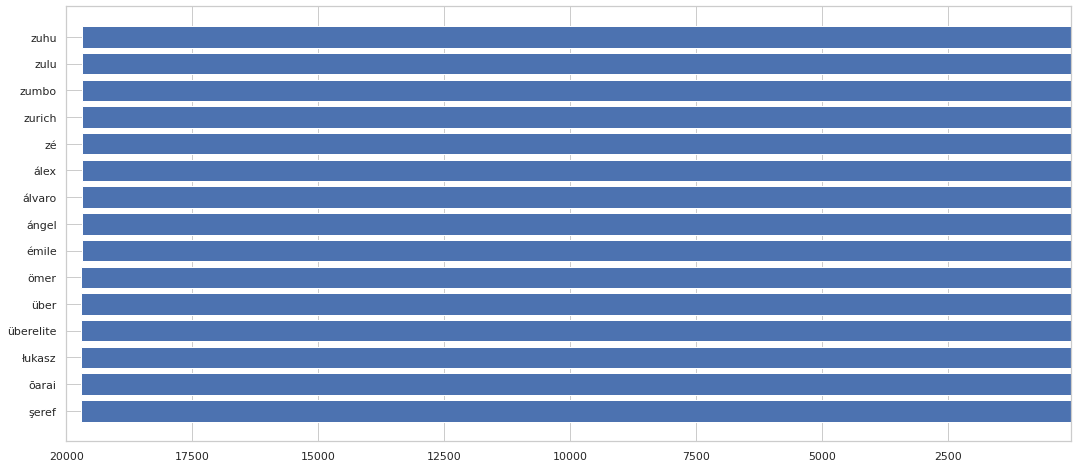

In [63]:
plt.figure( figsize = ( 18,8 ))
plt.xlim(20000, 60)
plt.barh(top15_most_occurred_words,top15_most_occurred_words_count)

The given code creates a horizontal bar chart using the matplotlib library. It sets the figure size to (18, 8) using the "figsize" parameter. It then sets the x-axis limits to range from 20000 to 60 using the "xlim" function. Finally, it creates a horizontal bar chart using the "barh" function, with the top 15 most occurred words on the y-axis and their corresponding counts on the x-axis.

#### 2. Removing Stopwords & Removing White spaces

In [64]:
# Remove Stopwords
#Removing stopwords
# extracting the stopwords from nltk library
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  
  print(i , end=',  ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

The given code imports the PorterStemmer module from the nltk.stem library, imports the re, nltk, and stopwords modules, and downloads the "stopwords" and "punkt" corpora from the nltk library. It then assigns the list of English stopwords to the variable "sw" using the "stopwords.words('english')" function.

Finally, it loops through the list of stopwords and prints each word separated by a comma.

In [65]:
print("Number of stopwords in english : ", len(sw))


Number of stopwords in english :  179


In [66]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

The given code defines a function named "remove_stopwords" that takes a string of text as input. The function removes all stopwords from the text using a list comprehension and the "not in" operator. It then converts all remaining words to lowercase using the "lower()" method. Finally, it joins the list of words back into a single string using the "join()" method with a space separator.

Assuming the "sw" variable contains a list of stopwords

## What is the need of removing stopwords?


Stopwords are commonly used words in a language that do not carry significant meaning and are often used to build the structure of a sentence. Examples of stopwords in English include "the", "a", "an", "and", "or", "in", "on", "at", "to", etc.

In text analysis or natural language processing tasks such as text classification, sentiment analysis, topic modeling, and information retrieval, stopwords can often be removed from the text without losing much information. Removing stopwords can help reduce the noise in the data and focus on the important content-carrying words. This can help improve the efficiency and accuracy of the analysis.

Moreover, removing stopwords can help reduce the dimensionality of the data, which can be useful in cases where the number of features (i.e., words) is large relative to the number of observations (i.e., documents). Reducing the dimensionality can help reduce the computational complexity of the analysis and help prevent overfitting.

Overall, removing stopwords can help improve the quality and efficiency of text analysis and is considered as one of the standard preprocessing steps in natural language processing.

#### 3. Cleaning Text

In [67]:
# Cleaning Text
stemmer = PorterStemmer()
# Cleaning the text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

The given code defines a function named "clean_text" that takes a string of text as input. The function performs several preprocessing steps on the text to clean and normalize it before analysis.

The preprocessing steps are as follows:

1.Convert the text to lowercase using the "lower()" method.

2.Replace certain symbols (i.e., parentheses, brackets, etc.) with a space using a regular expression pattern defined in the "REPLACE_BY_SPACE_RE" variable.

3.Remove any "XXXX" values present in the text using the "replace()" method.

4.Remove any digits in the text using a regular expression pattern defined in the "REMOVE_NUM" variable.

5.Remove any symbols (i.e., punctuation, special characters, etc.) not in the range of 0-9, a-z, or spaces using a regular expression pattern defined in the "BAD_SYMBOLS_RE" variable.

6.Remove any stopwords (i.e., common words that do not carry significant meaning) using the "set()" method and the "stopwords" corpus from NLTK.

7.Remove any words composed of less than 2 or more than 21 letters.

8.Perform stemming using the Porter stemmer algorithm from the NLTK library.




In [68]:
#applying the clean text funtion to the combined feature column for cleanup
nf["combined_text_feat"] = nf["combined_text_feat"].apply(clean_text)
nf["combined_text_feat"]

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit meico c...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7777, dtype: object

Now,all the values of description are free from  punctutations and stopwords.

In [69]:
#combining two columns of text data in a pandas DataFrame to create a new column for further analysis
nf['filtered'] = nf['description'] + ' '+ nf['genres']

In [70]:
#to remove any non-alphabetic characters from the text data 
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
nf['filtered'] = nf['filtered'].apply(cleaned)

In [71]:
nf['filtered' ]= nf['filtered'].str.lower()
nf['filtered']

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: filtered, Length: 7777, dtype: object

# 4. **Normalization**

##Why normalisation needed in ML?

Normalization is a common pre-processing step in machine learning that is used to rescale numerical features to a common scale. Normalization is typically used when the range of values for different features varies widely, and this can cause problems for certain machine learning algorithms that are sensitive to the scale of the input data.

By normalizing the features to a common scale, we can ensure that all features are equally important during training, and we can prevent certain features from dominating others. Normalization also helps improve the accuracy and performance of many machine learning models by reducing the impact of outliers and improving the convergence of optimization algorithms.

In summary, normalization is a critical step in machine learning that is used to standardize the scale of input data and improve the accuracy and performance of many machine learning models.

# **SnowballStemmer**

The Snowball Stemmer is a stemming algorithm that is used to reduce words to their root form or base form. It is an implementation of the Porter Stemming Algorithm that was designed to be more efficient and more easily adaptable to different languages.

The Snowball Stemmer is a part of the Natural Language Toolkit (NLTK) library and is used to preprocess text data in natural language processing (NLP) applications. It works by applying a set of rules to reduce words to their root form or base form, which can help to reduce the size of the vocabulary and improve the efficiency of NLP models.

The Snowball Stemmer is language-specific, which means that there are different stemmers for different languages. Some of the languages supported by the Snowball Stemmer include English, French, German, Italian, Spanish, and Russian.

Overall, the Snowball Stemmer is a useful tool in NLP that helps to preprocess text data by reducing words to their root form or base form, and it can be easily adapted to different languages.

In [72]:
# Normalizing Text (i.e., Stemming)
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [73]:
# Create an object of stemming function
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [74]:
def wordfilter(string, filtwords):
    filtered = []
    tokens = word_tokenize(string) 
    for word in tokens:
        if word not in filtwords:
            filtered.append(stemmer.stem(word))
    return filtered

nf['filtered_new'] = ''
for item, row in nf.iterrows():
    nf.at[item, 'filtered_new'] = wordfilter(row['filtered'], stop_words)
    
nf['filtered_new']

0       [futur, elit, inhabit, island, paradis, far, c...
1       [devast, earthquak, hit, mexico, citi, trap, s...
2       [armi, recruit, found, dead, fellow, soldier, ...
3       [postapocalypt, world, ragdol, robot, hide, fe...
4       [brilliant, group, student, becom, cardcount, ...
                              ...                        
7782    [lebanon, civil, war, depriv, zozo, famili, he...
7783    [scrappi, poor, boy, worm, way, tycoon, dysfun...
7784    [documentari, south, african, rapper, nasti, c...
7785    [dessert, wizard, adriano, zumbo, look, next, ...
7786    [documentari, delv, mystiqu, behind, bluesrock...
Name: filtered_new, Length: 7777, dtype: object

Each word in the sentence has been reduced to its base form using the SnowballStemmer. This can help to improve the performance of models that process text data, by reducing the number of unique words that need to be processed.

In [75]:
#list of filtered and stemmed words for each row into a single string with all the words separated by spaces
def join_words(x):
  return " ".join(x)
nf['filtered_new'] = nf['filtered_new'].apply(join_words)

In [76]:
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead his fellow ...        2018           12   
3  In a postapocalyptic world ragdoll robots hide...        2017           11   
4  A brilliant group of students become cardcount...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

In [77]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [78]:
#Stemming for description
nf['description'] = nf['description'].apply( Apply_stemming )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  
0  futur elit inhabit island paradis far crowd sl...  
1  devast earthquak hit mexico citi trap survivor...  
2  armi recruit found dead fellow soldier forc co...  
3  postapocalypt world ragdol robot hide fear dan...  
4  brilliant group student becom cardcount expert...

# 4. **Vectorization**

What is the need of vectorization in ml?

In machine learning, the input data is typically in the form of unstructured data such as text, images, audio, etc. However, most machine learning algorithms require numerical data as input. Therefore, we need to transform the unstructured data into a structured numerical format before feeding it into the algorithm. This process is called vectorization.

Vectorization is the process of converting a collection of text documents into a numerical feature matrix. Each document is represented as a vector of features, with each feature representing a specific aspect of the document. This allows the machine learning algorithms to work with the data and make predictions or classifications based on the patterns and relationships in the feature matrix.





# TF-IDF

TF-IDF stands for "Term Frequency-Inverse Document Frequency". It is a numerical statistic that reflects the importance of a word in a document or corpus.

TF-IDF is calculated based on two factors:

1.Term Frequency (TF): This measures how frequently a term occurs in a document. It is calculated as the ratio of the number of times a word appears in a document to the total number of words in the document.

2.Inverse Document Frequency (IDF): This measures how important a term is across all documents in the corpus. It is calculated as the logarithm of the ratio of the total number of documents in the corpus to the number of documents that contain the term.

The TF-IDF score for a word in a document is obtained by multiplying the TF and IDF scores for that word.

The main purpose of using TF-IDF is to identify the most important words in a document or corpus, which can then be used for tasks such as text classification, information retrieval, and content-based recommendation systems.

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(nf["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names_out()).head()

aamir  aamir khan  aaron  abandon  abduct  abil  aboard  abraham  absurd  \
0    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
1    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
2    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
3    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   
4    0.0         0.0    0.0      0.0     0.0   0.0     0.0      0.0     0.0   

   abus  ...  young son  young woman  young women  younger  youth  zach  zani  \
0   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
1   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
2   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
3   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   
4   0.0  ...        0.0          0.0          0.0      0.0    0.0   0.0   0.0   

   zealand  zoe  zombi  
0      0.0  0.0    0.0  
1      0.0  0.0    0.0  
2      0.0  0.0    0.0  
3      0.0  0.0    0.0  
4      0.0  0.0    0.0  

[5 rows x 2803 columns]

The TF-IDF vectorizer calculates the importance of each word in the corpus (i.e., all the documents combined) by weighting the term frequency (TF) by the inverse document frequency (IDF). This helps to identify words that are unique to each document and hence may be more important in determining document similarity or classification.

In [80]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [81]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [82]:
words = nf.filtered_new
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=10000)
X= t_vectorizer.fit_transform(words)
X

<7777x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 132851 stored elements in Compressed Sparse Row format>

# **Creating a new DataFrame vocab_after_stemming**

In [83]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [84]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [85]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [86]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14327, 14326, 14325, 14324, 14323, 14322, 14321, 14320, 14319,
       14318, 14317, 14316, 14315, 14314, 14313])

<BarContainer object of 15 artists>

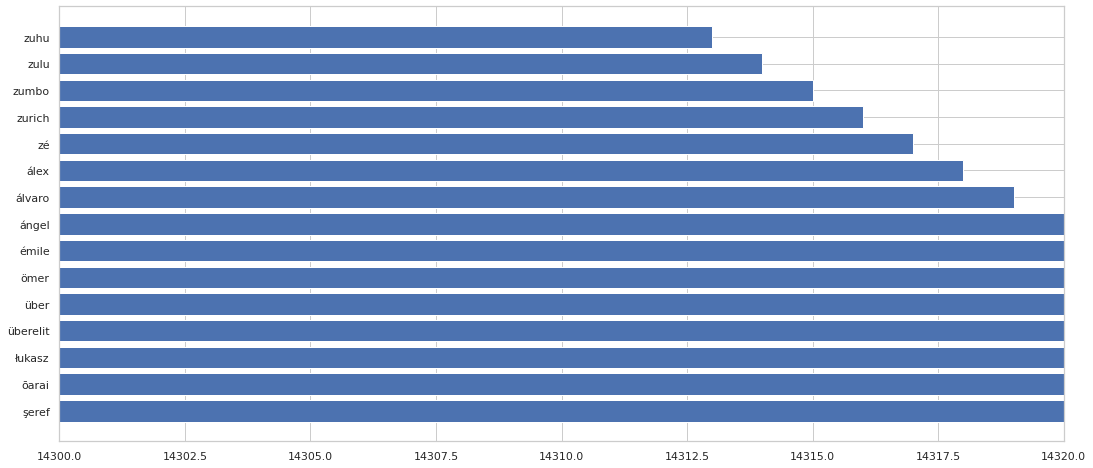

In [87]:
plt.figure( figsize = ( 18,8 ))
plt.xlim(14300, 14320)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

# **Adding a new column length  containing length of description**

In [88]:
nf['Length(description)'] = nf['description'].apply(lambda x: len(x))

In [89]:
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

In [90]:
nf.description.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the 3 save from squalor'

In [91]:
len(nf.description.iloc[0])

125

# **Creating a new DataFrame vocab_after_stemming_listed_in & removing punctutations**

In [92]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'Movie Release type', 'combined_text_feat',
       'filtered', 'filtered_new', 'Length(description)'],
      dtype='object')

In [93]:
nf['genres'] = nf['genres'].apply(remove_punctuation)
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  International TV Shows TV Dramas TV SciFi  Fan...   
1                        Dramas International Movies   
2                 Horror Movies International Movies   
3  Action  Adventure Independent Movies SciFi  Fa...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

In [94]:
#Remove stopwords for listed_in(genres)
nf['genres'] = nf['genres'].apply( remove_stopwords )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                              genres  \
0  international tv shows tv dramas tv scifi fantasy   
1                        dramas international movies   
2                 horror movies international movies   
3  action adventure independent movies scifi fantasy   
4                                             dramas   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

# **Using CountVectorizer() to count vocabulary items**

In [95]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['genres'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [96]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [97]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [98]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [99]:
listed_in_vocab_before_stem.head().append(listed_in_vocab_before_stem.tail())

Word  count
1          tv     41
12  thrillers     40
40       teen     39
39       talk     38
37    standup     37
33   children      4
24    british      3
18      anime      2
9   adventure      1
8      action      0

# **TOP 15 most occurred words in listed in**

In [100]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [101]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [102]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

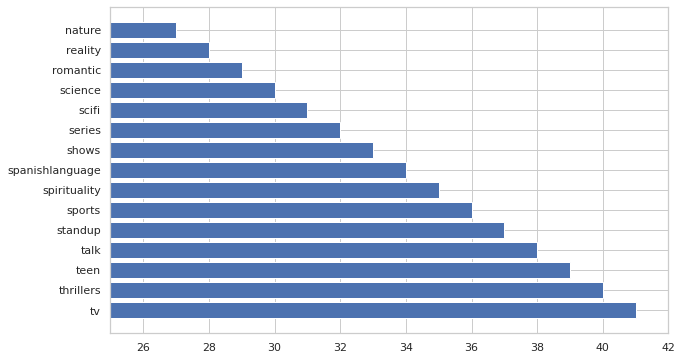

In [103]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

In [104]:
#SNOWBALL STEMMER FOR ENGLISH
#Stemming for description
nf['genres'] = nf['genres'].apply( Apply_stemming )
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                        genres  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  
0  futur elit inhabit island paradis far crowd sl...                  125  
1  devast earthquak hit mexico citi trap survivor...                  123  
2  armi recruit found dead fellow soldier forc co...                  132  
3  postapocalypt world ragdol robot hide fear dan...                  126  
4  brilliant group student becom cardcount expert...                  126

# **Now will use tf-idf Vectorizer (after stemming)**

In [105]:
# Create the object of tfidf vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['genres'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [106]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [107]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

# **Creating a new DataFrame vocab_after_stemming_listed_in**

In [108]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [109]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [110]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [111]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

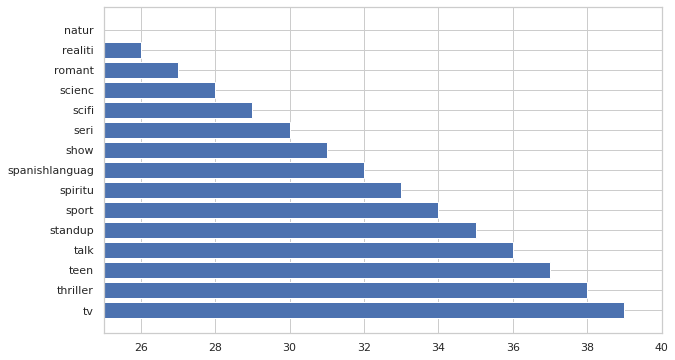

In [112]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

# **Adding a new column length( listed-in ) which will contain length of listed_in**

In [113]:
nf['Length(genres)'] = nf['genres'].apply(lambda x: len(x))
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                        genres  \
0     intern tv show tv drama tv scifi fantasi   
1                            drama intern movi   
2                      horror movi intern movi   
3  action adventur independ movi scifi fantasi   
4                                        drama   

                                         description  year_added  month_added  \
0  in a futur where the elit inhabit an island pa...        2020            8   
1  after a devast earthquak hit mexico citi trap ...        2016           12   
2  when an armi recruit is found dead his fellow ...        2018           12   
3  in a postapocalypt world ragdol robot hide in ...        2017           11   
4  a brilliant group of student becom cardcount e...        2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new  Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                  125   
1  devast earthquak hit mexico citi trap survivor...                  123   
2  armi recruit found dead fellow soldier forc co...                  132   
3  postapocalypt world ragdol robot hide fear dan...                  126   
4  brilliant group student becom cardcount expert...                  126   

   Length(genres)  
0              40  
1              17  
2              23  
3              43  
4               5

In [114]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'Movie Release type', 'combined_text_feat',
       'filtered', 'filtered_new', 'Length(description)', 'Length(genres)'],
      dtype='object')

In [115]:
nf[['description', 'Length(description)', 'genres' ,'Length(genres)' ]].head()

description  Length(description)  \
0  in a futur where the elit inhabit an island pa...                  125   
1  after a devast earthquak hit mexico citi trap ...                  123   
2  when an armi recruit is found dead his fellow ...                  132   
3  in a postapocalypt world ragdol robot hide in ...                  126   
4  a brilliant group of student becom cardcount e...                  126   

                                        genres  Length(genres)  
0     intern tv show tv drama tv scifi fantasi              40  
1                            drama intern movi              17  
2                      horror movi intern movi              23  
3  action adventur independ movi scifi fantasi              43  
4                                        drama               5

# **Clustering**:
Clustering can be considered the most important unsupervised learning problem. So, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

We have used 3 clustering algorithms:

1.DBSCAN

2.K-means

3.Agglomerative clustering

The silhouette score and elbow method are not clustering algorithms themselves, but are techniques used to evaluate the quality of clustering or determine the optimal number of clusters, respectively.

# **Silhouette Score**

The silhouette score is a metric used to evaluate the quality of clustering in machine learning and data analysis. The silhouette score measures how well each data point fits into its assigned cluster, based on both its distance from other points in its own cluster and its distance from points in neighboring clusters.

The silhouette score ranges from -1 to 1, with higher values indicating better clustering. A score of 1 indicates that a data point is well-matched to its cluster and poorly matched to neighboring clusters. A score of 0 indicates that a data point is equally close to points in its own cluster and neighboring clusters, and a score of -1 indicates that a data point is poorly matched to its own cluster and well-matched to neighboring clusters.

The silhouette score can be used to evaluate the quality of different clustering algorithms, compare different parameter settings for the same algorithm, or compare different clusterings of the same data. It can help to identify whether a dataset is inherently difficult to cluster or whether a particular algorithm or parameter setting is producing suboptimal results. However, the silhouette score is not a perfect metric and should be used in conjunction with other evaluation techniques and domain knowledge.

In [116]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'Movie Release type', 'combined_text_feat',
       'filtered', 'filtered_new', 'Length(description)', 'Length(genres)'],
      dtype='object')

In [117]:
X_features_rec = nf[['Length(description)','Length(genres)']]
stdscaler = preprocessing.StandardScaler()
X_features_rec.describe()

Length(description)  Length(genres)
count          7777.000000     7777.000000
mean            127.249839       24.328019
std              10.667520       10.685483
min              51.000000        4.000000
25%             123.000000       17.000000
50%             129.000000       24.000000
75%             133.000000       32.000000
max             229.000000       62.000000

In [118]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [119]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3526717072490138
For n_clusters = 3, silhouette score is 0.3799630857213421
For n_clusters = 4, silhouette score is 0.3904040611667212
For n_clusters = 5, silhouette score is 0.33891781756783795
For n_clusters = 6, silhouette score is 0.33552814958900923
For n_clusters = 7, silhouette score is 0.34126788640427547
For n_clusters = 8, silhouette score is 0.3281740792185596
For n_clusters = 9, silhouette score is 0.3297478653258667
For n_clusters = 10, silhouette score is 0.32888444580583726
For n_clusters = 11, silhouette score is 0.324776739383367
For n_clusters = 12, silhouette score is 0.3282137644980479
For n_clusters = 13, silhouette score is 0.3269195404488703
For n_clusters = 14, silhouette score is 0.337277588871214
For n_clusters = 15, silhouette score is 0.3340231241957605


In [120]:
k_clusters = 45

In [121]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)

KMeans(max_iter=600, n_clusters=45, n_init=10, random_state=42, tol=1e-06)

In [122]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X)
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.34439630393882836


In [123]:
#Adding a seperate column for the clusters
nf["Cluster Label"] = clusters
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ...  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...   
1  December 23, 2016          2016  TV-MA     93 min  ...   
2  December 20, 2018          2011      R     78 min  ...   
3  November 16, 2017          2009  PG-13     80 min  ...   
4    January 1, 2020          2008  PG-13    123 min  ...   

                                         description year_added  month_added  \
0  in a futur where the elit inhabit an island pa...       2020            8   
1  after a devast earthquak hit mexico citi trap ...       2016           12   
2  when an armi recruit is found dead his fellow ...       2018           12   
3  in a postapocalypt world ragdol robot hide in ...       2017           11   
4  a brilliant group of student becom cardcount e...       2020            1   

   Movie Release type                                 combined_text_feat  \
0                 New  intern tv show tv drama tv scifi fantasi futur...   
1                 New  drama intern movi devast earthquak hit meico c...   
2  Early 21st century  horror movi intern movi armi recruit found dea...   
3  Early 21st century  action adventur independ movi scifi fantasi po...   
4  Early 21st century  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

   Length(genres)  Cluster Label  
0              40             34  
1              17             41  
2              23              9  
3              43              7  
4               5             39  

[5 rows x 21 columns]

In [124]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15)

n clusters  silhouette score
2            4              0.39
1            3              0.38
0            2              0.35
3            5              0.34
4            6              0.34
5            7              0.34
12          14              0.34
6            8              0.33
7            9              0.33
8           10              0.33
10          12              0.33
11          13              0.33
13          15              0.33
9           11              0.32

The value of the silhouette coefﬁcient lies between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.

For n_clusters = 2 The average silhouette_score is : 0.3528341260948457
For n_clusters = 3 The average silhouette_score is : 0.3799525486968659
For n_clusters = 4 The average silhouette_score is : 0.39082364218455384
For n_clusters = 5 The average silhouette_score is : 0.3390559801750613
For n_clusters = 6 The average silhouette_score is : 0.3349133911091385
For n_clusters = 7 The average silhouette_score is : 0.3399195127116291
For n_clusters = 8 The average silhouette_score is : 0.32905859215501926
For n_clusters = 9 The average silhouette_score is : 0.32906245091576297
For n_clusters = 10 The average silhouette_score is : 0.3277080136718393
For n_clusters = 11 The average silhouette_score is : 0.32635935718231174
For n_clusters = 12 The average silhouette_score is : 0.32646337176832824
For n_clusters = 13 The average silhouette_score is : 0.328476260764931
For n_clusters = 14 The average silhouette_score is : 0.3265642266443887
For n_clusters = 15 The average silhouette_score is : 0

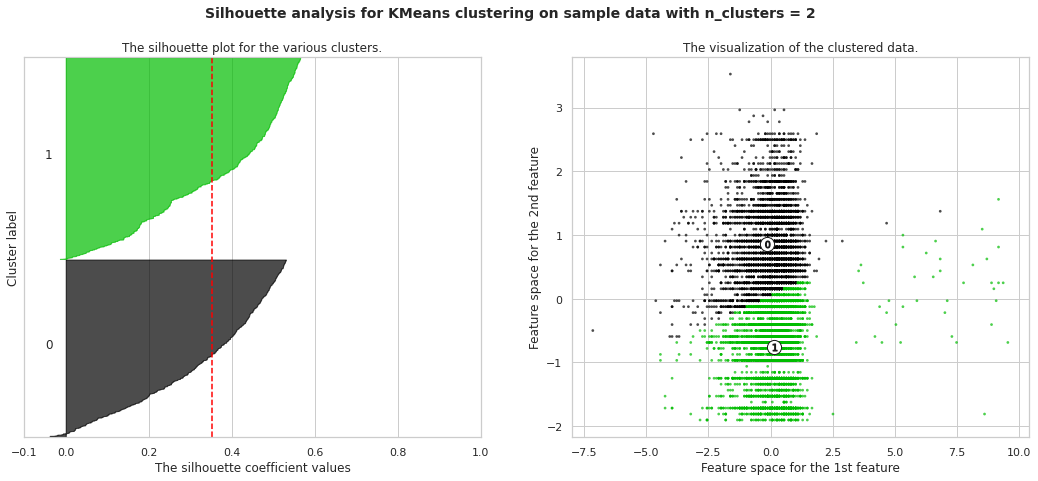

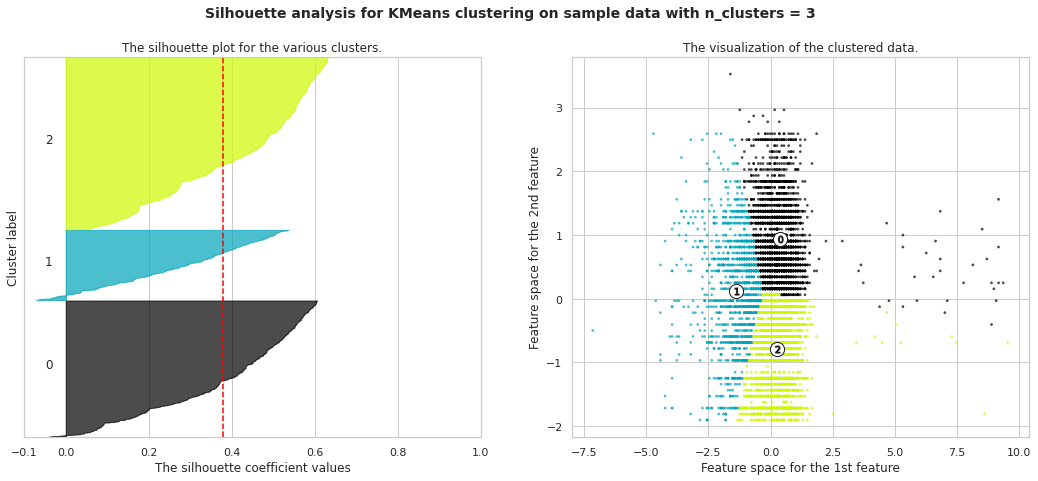

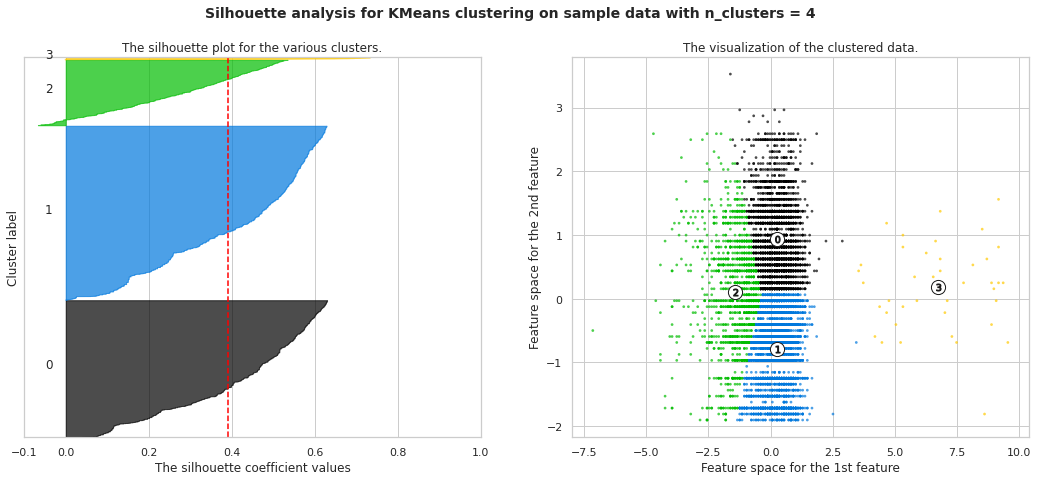

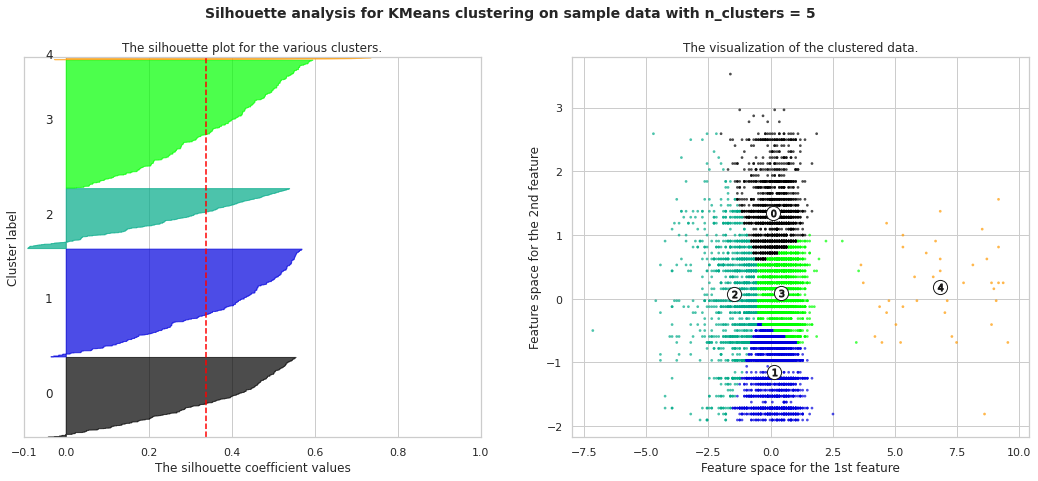

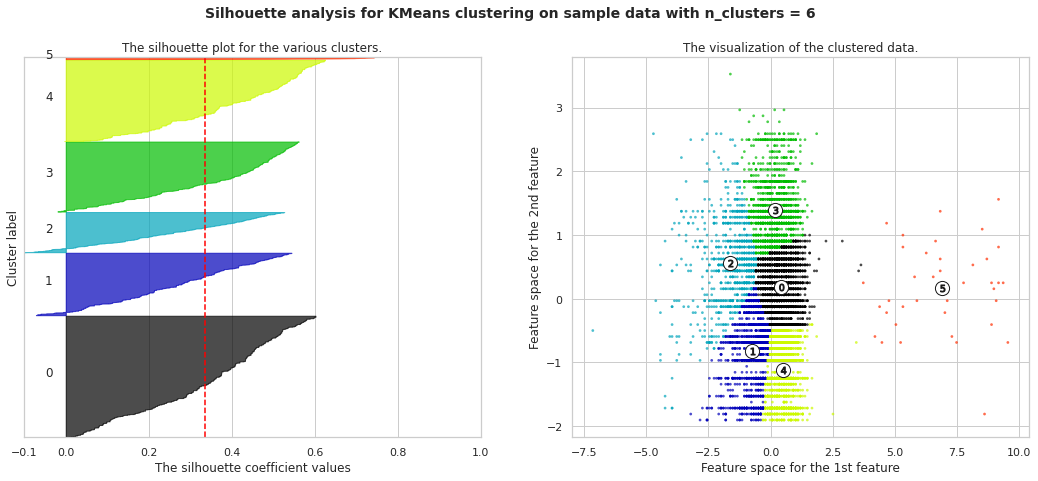

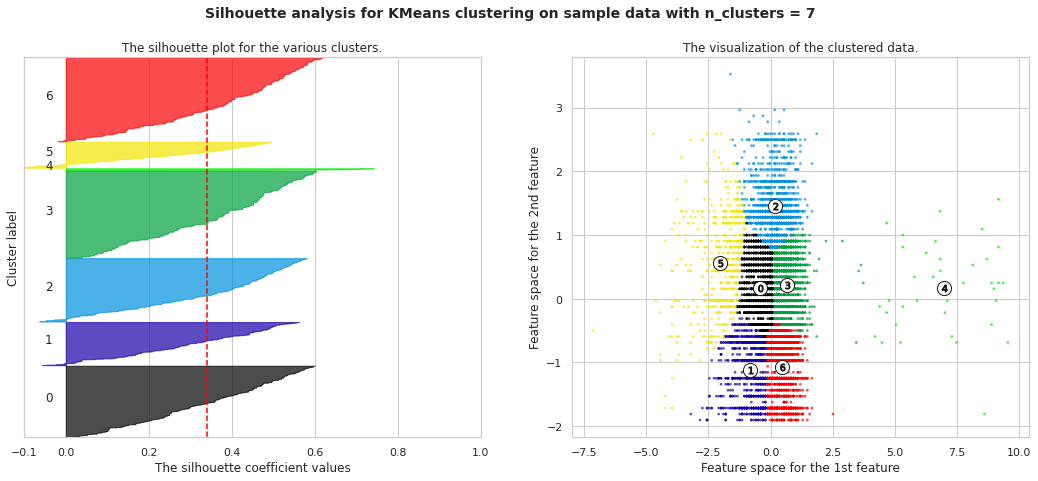

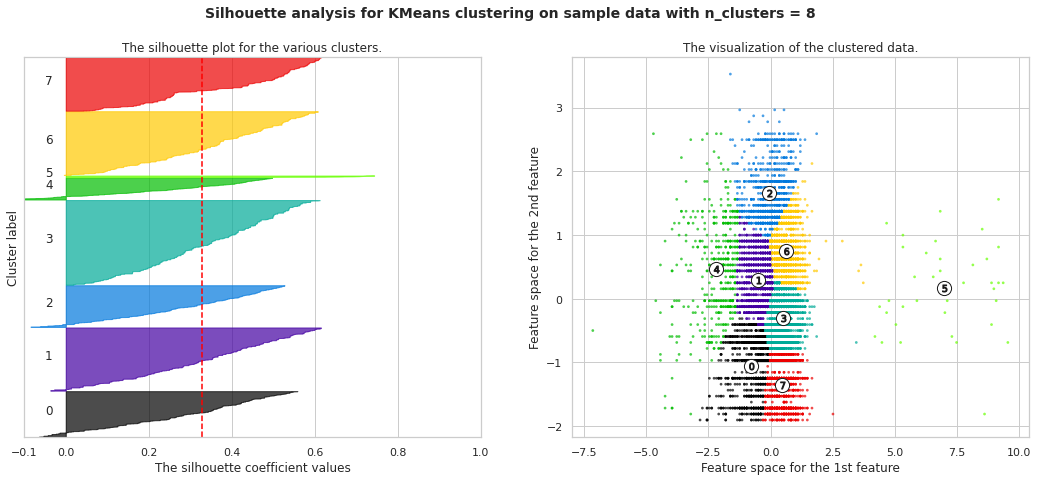

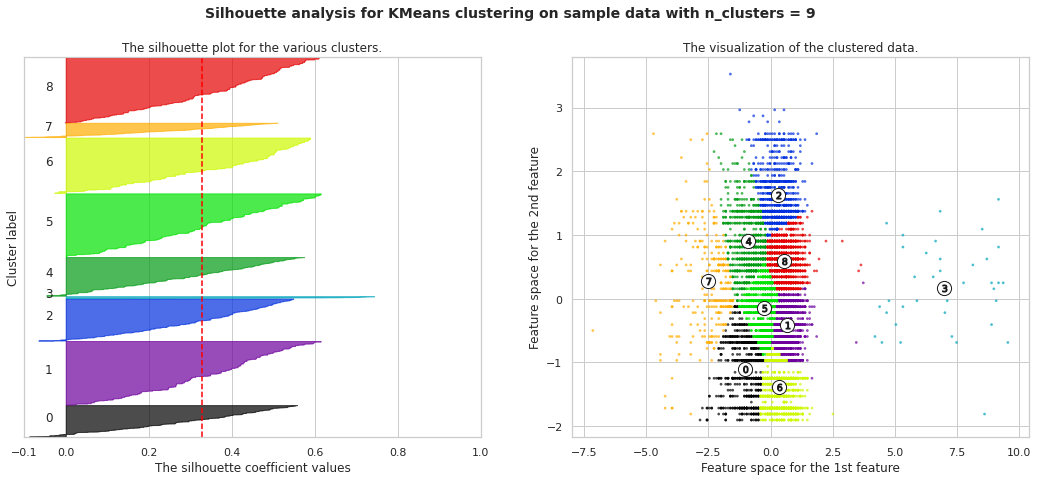

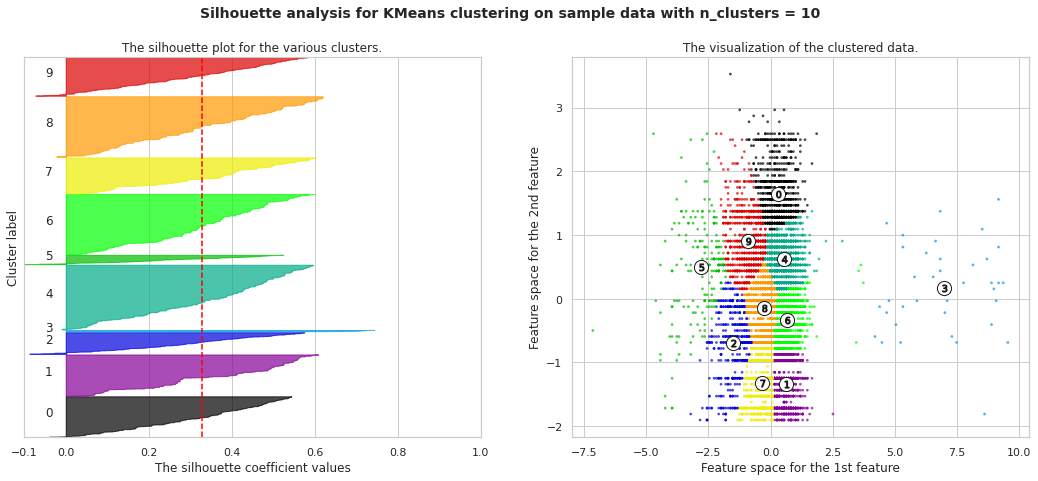

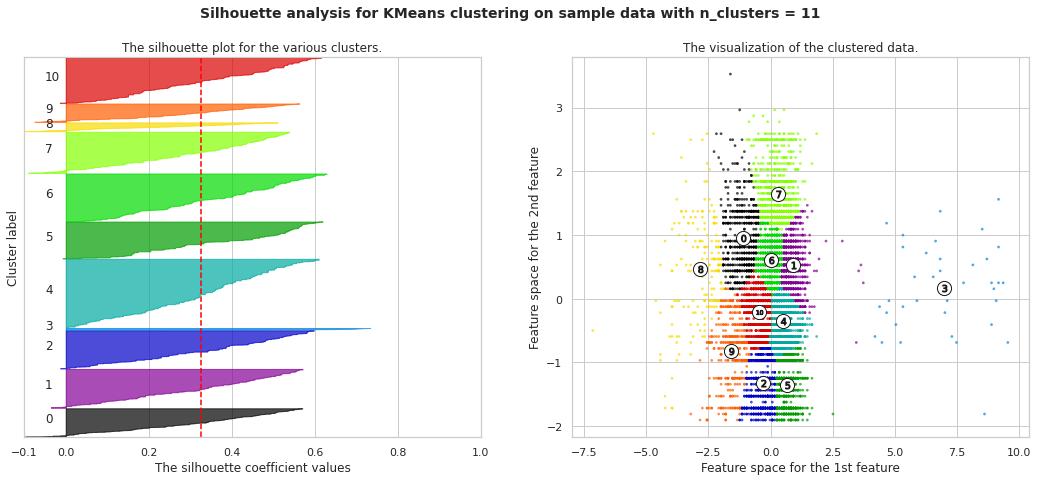

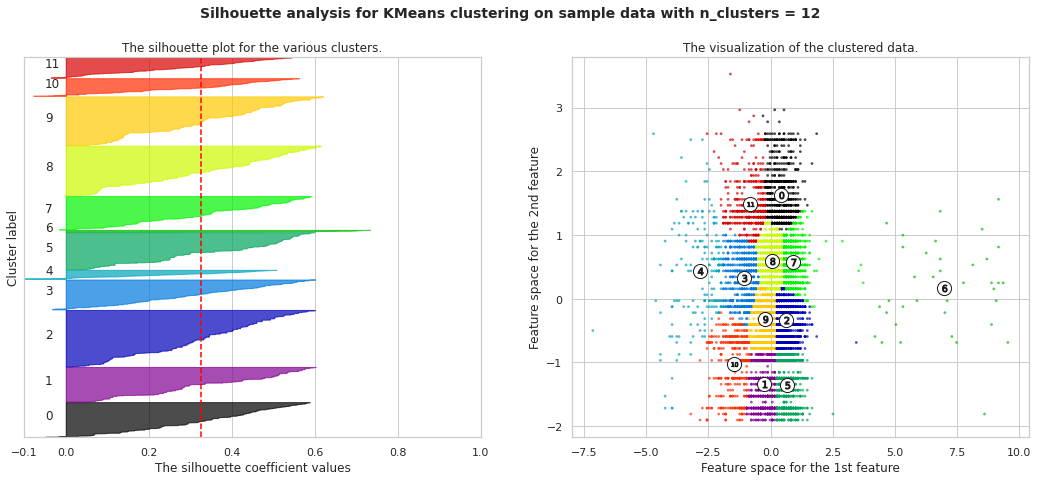

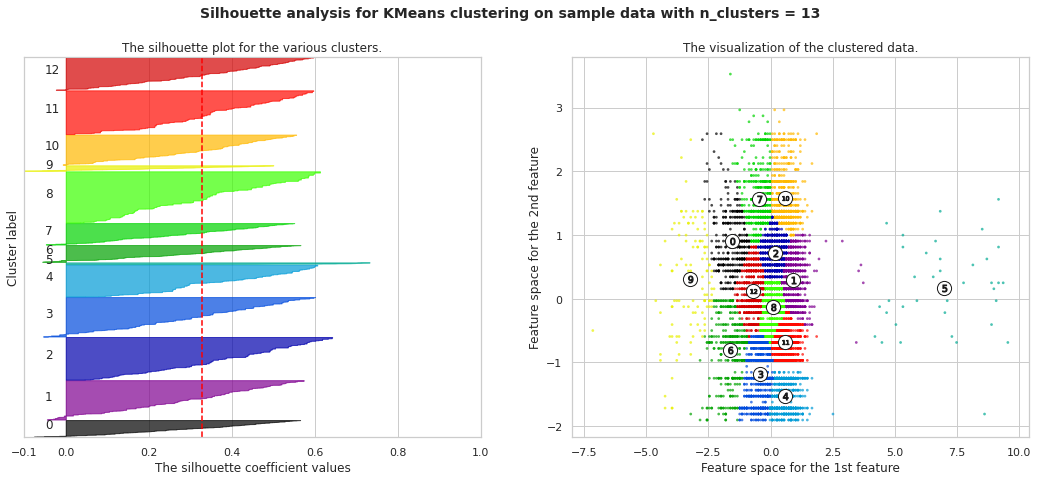

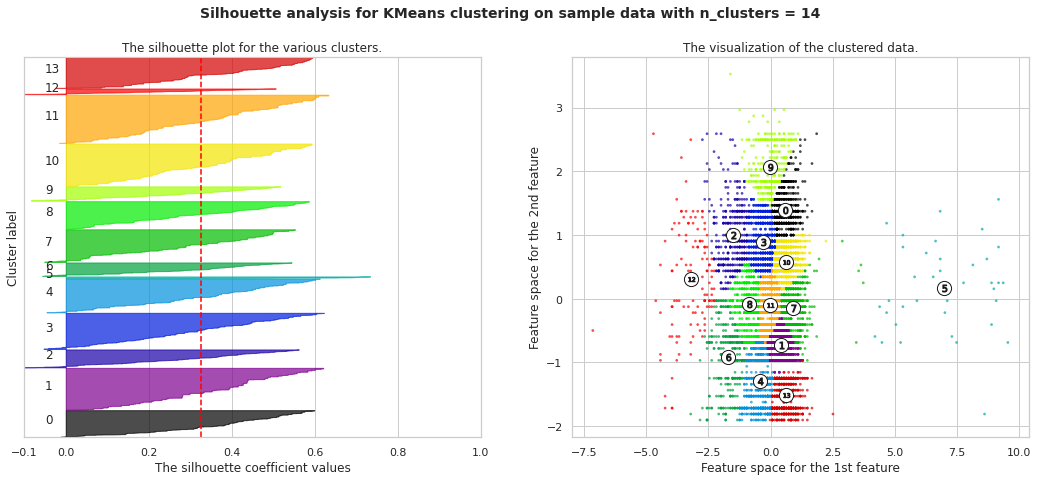

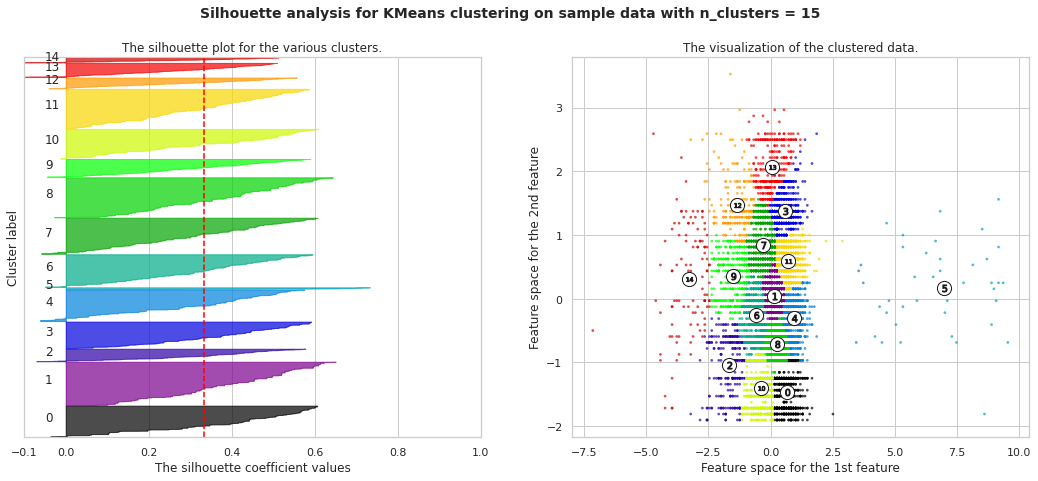

In [125]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

# **Elbow Method -Text based Clustering**

The elbow method is a common approach for determining the optimal number of clusters in text-based clustering. The method involves calculating the within-cluster sum of squares (WCSS) for different values of k (the number of clusters). The WCSS measures the distance between each data point and the centroid of its assigned cluster, and adding up the distances for all data points in the cluster.

To apply the elbow method in text-based clustering, the first step is to transform the text data into a numerical representation such as bag-of-words or TF-IDF. Then, a clustering algorithm such as k-means is applied with a range of k values. For each k value, the WCSS is calculated, and the results are plotted in a graph with k on the x-axis and WCSS on the y-axis.

The elbow method involves inspecting the plot and looking for the "elbow point," which is the point of inflection where the WCSS starts to flatten out. The optimal number of clusters is often taken to be the value of k at the elbow point, as it represents the point at which adding more clusters does not result in a significant improvement in clustering performance.

It is important to note that the elbow method is not a definitive or objective way to determine the optimal number of clusters, and it should be used in conjunction with other methods such as silhouette analysis and domain knowledge to ensure a robust clustering solution.







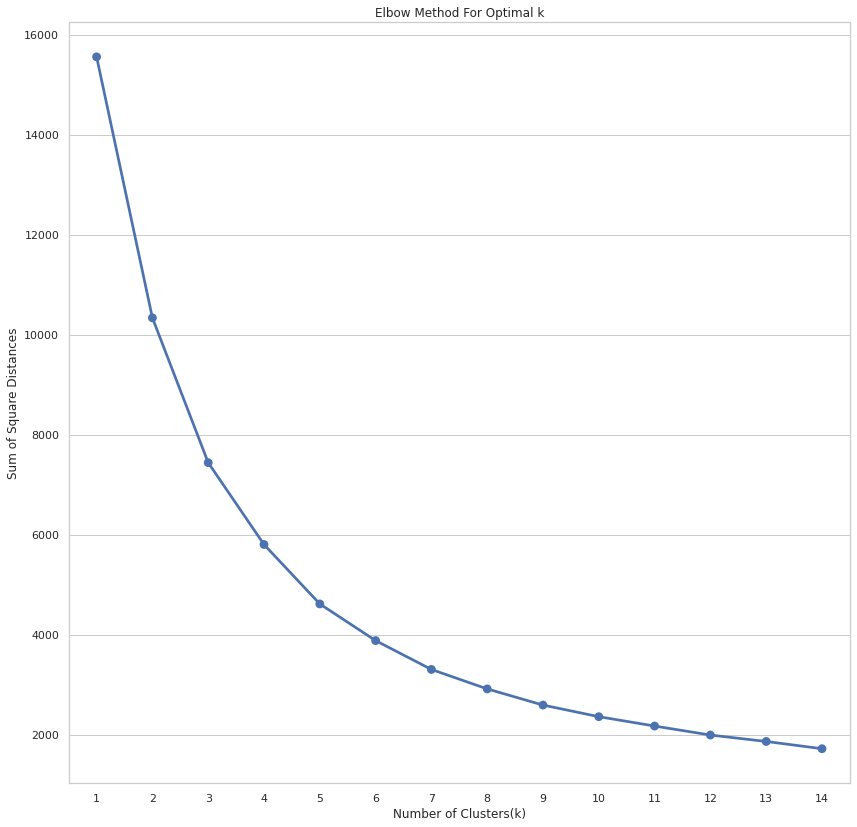

In [126]:
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This code snippet is an implementation of the elbow method in Python for determining the optimal number of clusters in KMeans clustering.

The code first creates an empty dictionary called sum_of_square_dist to store the sum of square distances for different values of k. Then, a for loop is used to iterate over a range of k values from 1 to 14 (inclusive). For each value of k, a KMeans object is created with the specified number of clusters (n_clusters=k), initialization method (init='k-means++'), and maximum number of iterations (max_iter=1000). The KMeans object is then fitted to the data X.

After fitting the KMeans object to the data for each value of k, the sum of square distances is computed and stored in the sum_of_square_dist dictionary using the km.inertia_ attribute. The inertia_ attribute of a KMeans object represents the sum of squared distances of samples to their closest cluster center.

Finally, the sns.pointplot() function from the seaborn library is used to plot the sum of square distance values (y) against the number of clusters (x) for each value of k. The x-axis is labeled as "Number of Clusters(k)", the y-axis is labeled as "Sum of Square Distances", and the title of the plot is "Elbow Method For Optimal k". The plt.show() function is then called to display the plot.

This code can be used as a starting point for implementing the elbow method in text-based clustering tasks where the goal is to determine the optimal number of clusters to use for grouping similar documents or text data. However, it should be noted that the optimal number of clusters determined by the elbow method is not always definitive and should be used in conjunction with other clustering evaluation metrics and domain knowledge to ensure a robust clustering solution.






 We will  use 3 clusters.

# **1.K-means**

In [127]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

This code snippet is an implementation of KMeans clustering in Python for clustering data into 3 clusters.

The code first creates a KMeans object called kmeans with n_clusters=3, which specifies that we want to group the data into 3 clusters.

Next, the kmeans.fit() method is called to fit the KMeans object to the data X. This involves running the KMeans algorithm to determine the cluster centers and assign each data point to a cluster.

After fitting the KMeans object to the data, the kmeans.predict() method is called to predict the cluster labels for each data point in X. The predicted cluster labels are stored in the variable y_kmeans.

Overall, this code can be used to cluster text data or other types of numerical data into 3 clusters using the KMeans algorithm. However, the number of clusters chosen (in this case 3) should be determined based on the problem domain and other evaluation metrics rather than chosen arbitrarily. Additionally, it may be necessary to preprocess the data (such as by applying feature scaling or dimensionality reduction techniques) before applying the KMeans algorithm to improve clustering performance.

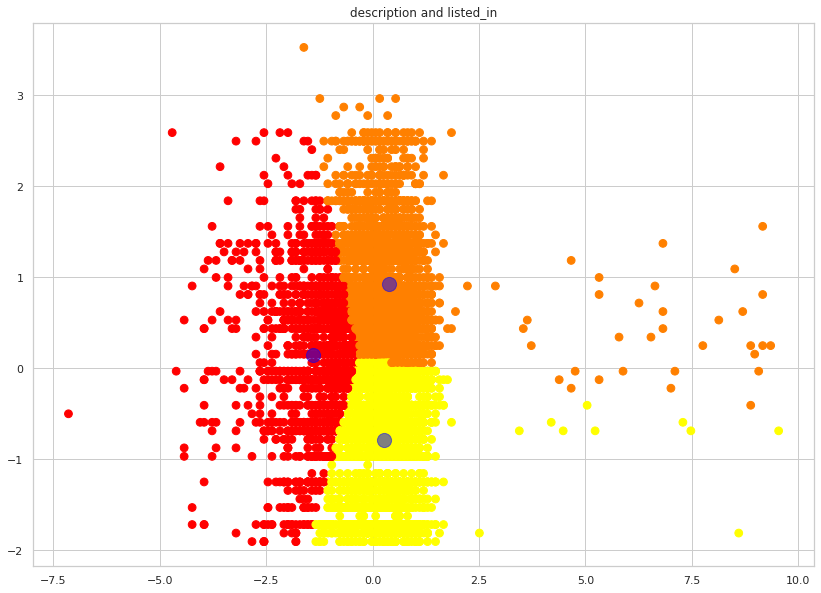

In [128]:
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='autumn')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

This code snippet is used to visualize the results of KMeans clustering in Python by creating a scatter plot of the data points colored by their predicted cluster labels and overlaying the cluster centers on the plot.

The code first creates a figure with a size of 14x10 inches using the plt.figure() function and sets the title of the plot to "description and listed_in" using the plt.title() function.

Next, the plt.scatter() function is called to create a scatter plot of the data X. The x-axis represents the values of the first column in X, which corresponds to the "description" feature, and the y-axis represents the values of the second column in X, which corresponds to the "listed_in" feature. The c parameter is set to y_kmeans, which contains the predicted cluster labels for each data point, to color the points based on their assigned cluster. The s parameter controls the size of the points, and the cmap parameter specifies the color map to use for coloring the points.

After creating the scatter plot of the data points, the kmeans.cluster_centers_ attribute is used to retrieve the coordinates of the cluster centers. The coordinates of the cluster centers are then plotted on the scatter plot using the plt.scatter() function with the c parameter set to 'blue' to color the points blue and the s parameter set to 200 to 

increase the size of the points. The alpha parameter is also set to 0.5 to make the cluster centers slightly transparent.

Overall, this code can be used to visualize the results of KMeans clustering in a 2-dimensional space and gain insights into how the data points are being clustered together. However, it is important to note that this visualization may not be suitable for high-dimensional data and other visualization techniques such as dimensionality reduction or clustering trees may be needed to gain a better understanding of the clustering results.





# **2. DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm in machine learning and data mining. It is a density-based clustering algorithm that groups together data points that are close to each other in a high-density region, while separating low-density regions and identifying noise points.

The algorithm works by defining two parameters: eps, which represents the maximum distance between two points for them to be considered as part of the same cluster, and min_samples, which represents the minimum number of points required to form a dense region.

The DBSCAN algorithm starts by selecting a random unvisited data point and identifying all neighboring points within a distance of eps from the selected point. If the number of neighboring points is greater than or equal to min_samples, a dense region (cluster) is formed and all neighboring points are added to the cluster. The algorithm then recursively visits the neighboring points and continues to add new points to the cluster until no more points can be added.
If the number of neighboring points is less than min_samples, the data point is marked as a noise point and the algorithm moves on to the next unvisited point. The algorithm continues to visit unvisited data points and form new clusters until all data points have been visited.

DBSCAN has several advantages over other clustering algorithms such as KMeans, including its ability to handle non-linearly separable clusters, its ability to identify noise points, and its robustness to outliers and parameter settings. However, it can be sensitive to the choice of parameters eps and min_samples, and it may not perform well on datasets with varying densities or irregular shapes.

In Python, the DBSCAN algorithm is implemented in the sklearn.cluster.DBSCAN module, and can be used in a similar way to other clustering algorithms in scikit-learn.

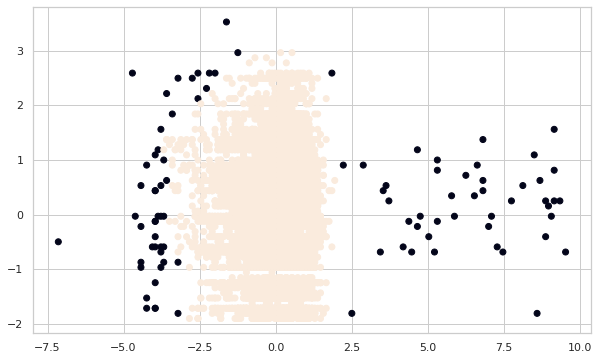

In [129]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

The first line of code imports the DBSCAN class from the sklearn.cluster module and the metrics module from scikit-learn, which can be used to evaluate the clustering performance.

The second line of code applies the DBSCAN algorithm to the data X with an eps parameter of 0.5 and a min_samples parameter of 20. These parameter values will determine the sensitivity of the algorithm to density and can be adjusted to achieve better clustering results.

The fit_predict() method is used to fit the model to the data and return the predicted cluster labels for each data point.

The next two lines of code create a scatter plot of the data points with the predicted cluster labels using the plt.scatter() function. The c parameter is set to y_pred, which contains the predicted cluster labels, to color the data points based on their assigned cluster.
Overall, this code snippet shows how to use the DBSCAN algorithm in Python to cluster data and visualize the clustering results using a scatter plot. However, it is important to note that the performance of the DBSCAN algorithm can be sensitive to the choice of parameters, and it may require some parameter tuning to achieve optimal results for a given dataset. Additionally, other clustering algorithms should also be considered and compared to the results obtained by DBSCAN.

# **Dendrogram**

A dendrogram is a tree-like diagram used to illustrate the arrangement of clusters produced by hierarchical clustering algorithms. It is a useful tool for visualizing the relationships between data points and clusters in a hierarchical clustering analysis.

In a dendrogram, the vertical axis represents the distance or dissimilarity between clusters or data points. The horizontal axis represents the data points or clusters being clustered. Each data point or cluster is represented by a horizontal line, and the height of each line corresponds to the distance between the clusters. The lines are then connected by vertical lines, representing the merging of clusters at each step of the hierarchical clustering algorithm.

The resulting dendrogram provides a visual representation of the clustering process, allowing for the identification of clusters and sub-clusters within the data. It can also be used to determine the optimal number of clusters, by looking for the point at which the vertical distance between clusters becomes larger, also known as the elbow point.

In Python, the scipy.cluster.hierarchy module provides functions for generating dendrograms from hierarchical clustering algorithms, such as linkage() to perform hierarchical clustering and dendrogram() to plot the dendrogram. The matplotlib library can also be used to customize and enhance the visualization of dendrograms.

In [130]:
#importing sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(200,100))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
#find largest vertical distance we can make without crossing any other horizontal line
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show() 

The number of clusters will be number of vertical lines which are intersected by the line drawn using the threshold

No. of Clusters = 3.

# **3.Agglomerative Clustering**

Agglomerative clustering is a type of hierarchical clustering algorithm that groups together similar data points into a hierarchy of nested clusters. The algorithm starts by treating each data point as a separate cluster, and then iteratively merges the two closest clusters until a stopping criterion is met.

Agglomerative clustering can be useful for identifying clusters with a hierarchical structure, as well as for visualizing the relationships between clusters using a dendrogram. However, it can be computationally expensive for large datasets and may require tuning of parameters such as the linkage criterion and stopping criterion.

In [131]:
#import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

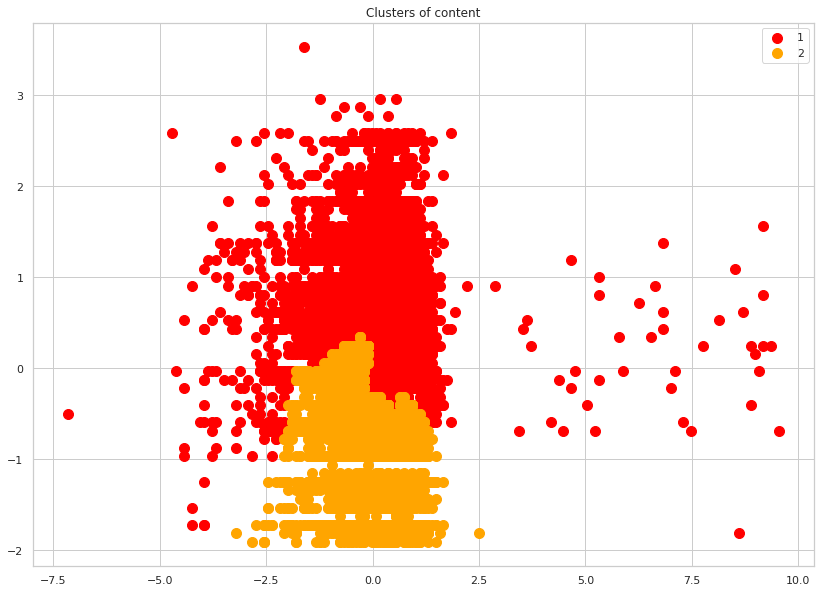

In [132]:
# Visualizing the clusters
plt.figure(figsize=(14,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'orange', label = '2')


plt.title('Clusters of content')

plt.legend()
plt.show()

# **Dimensionality Reduction**

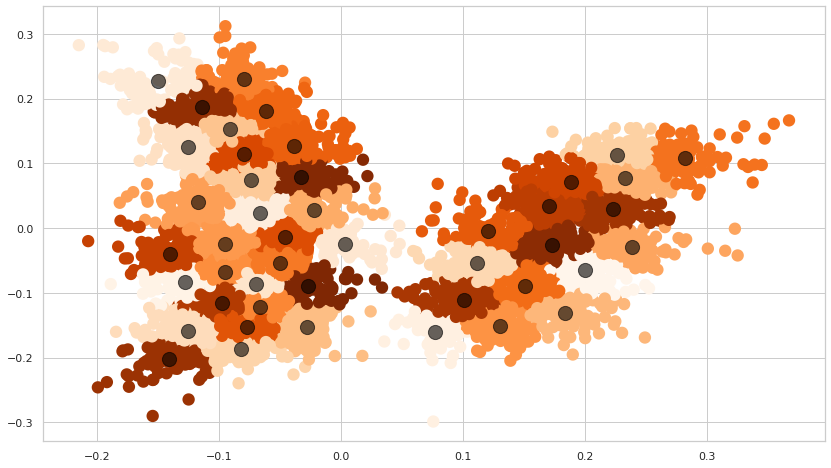

In [133]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(14,8))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='Oranges_r', linewidths=6)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [134]:
#Predicting the clusters and evaluating the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3460667101843362


In [135]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster 
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names_out()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

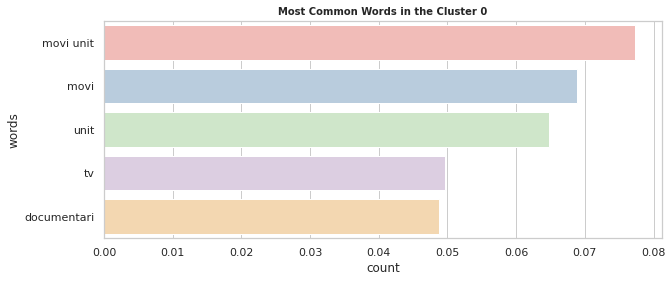

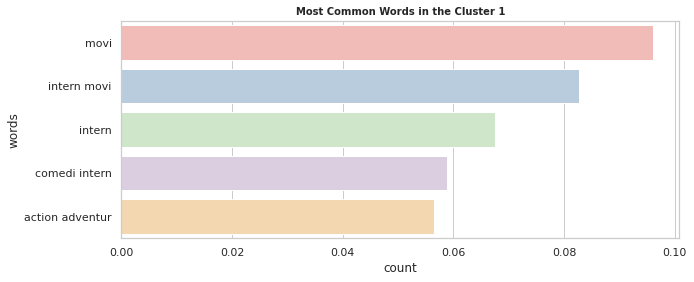

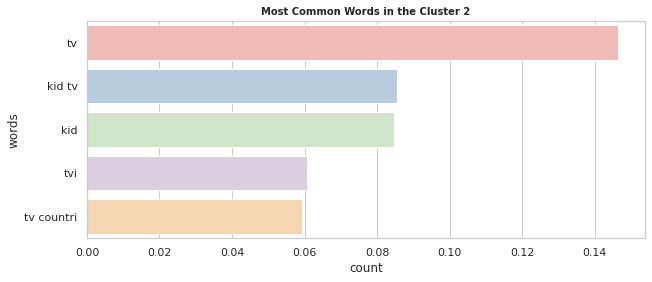

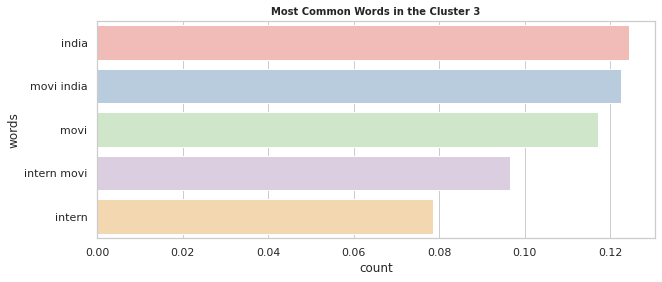

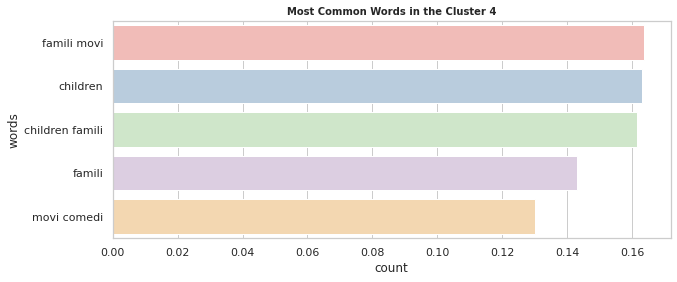

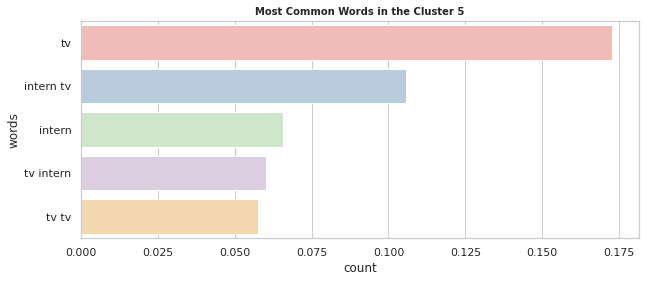

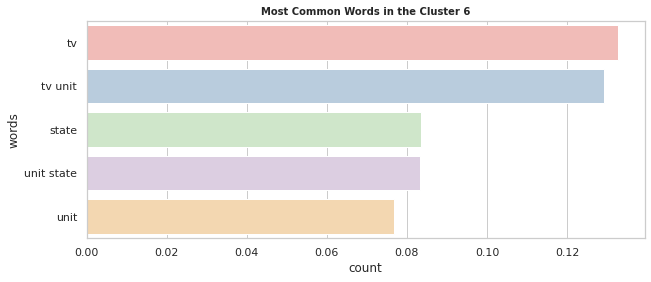

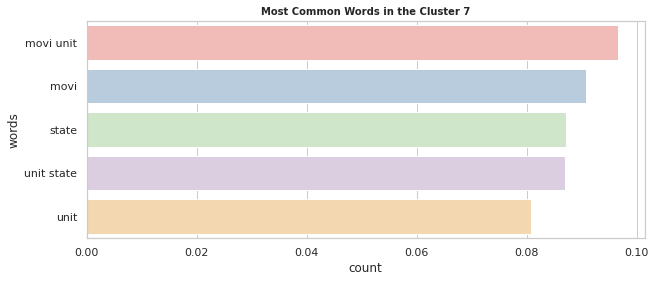

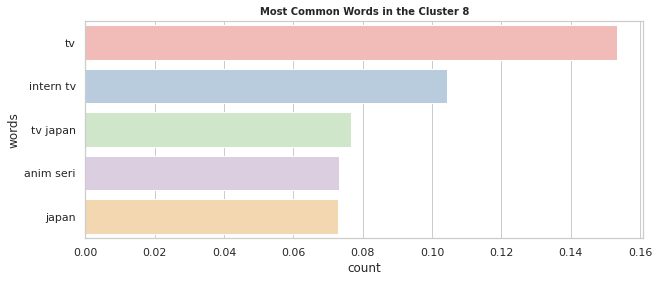

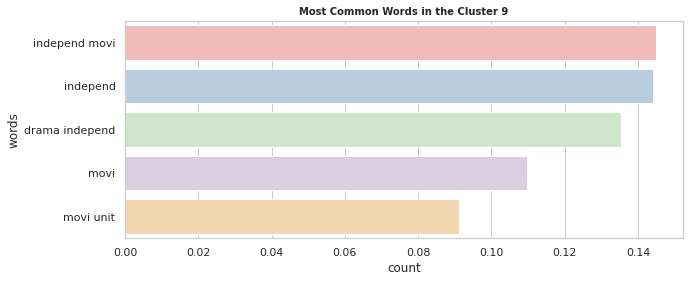

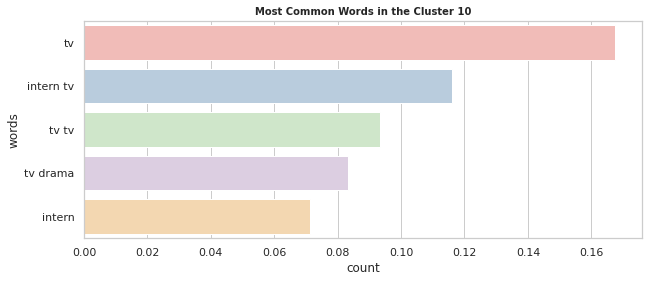

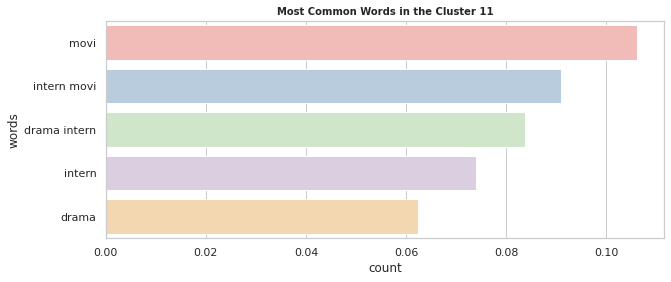

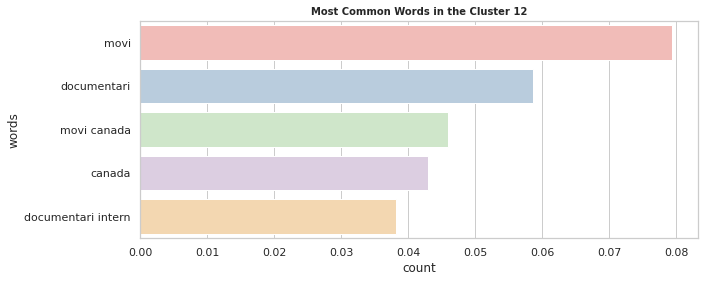

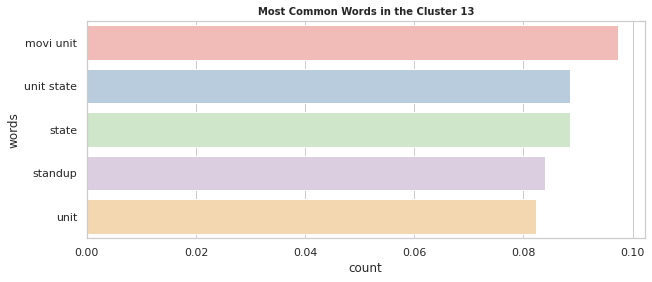

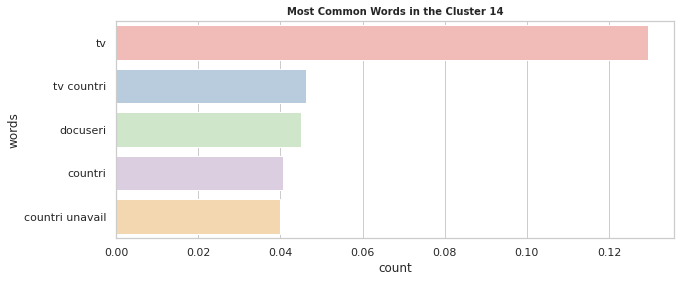

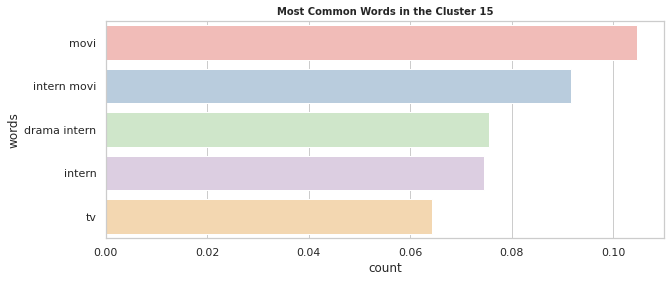

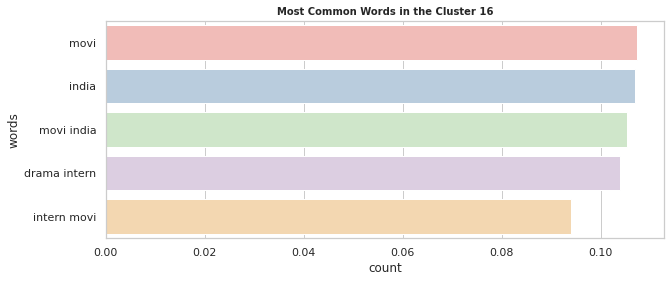

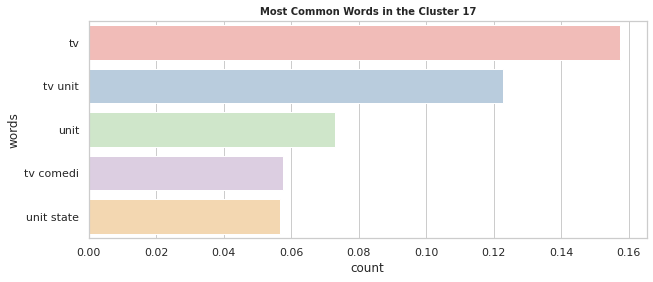

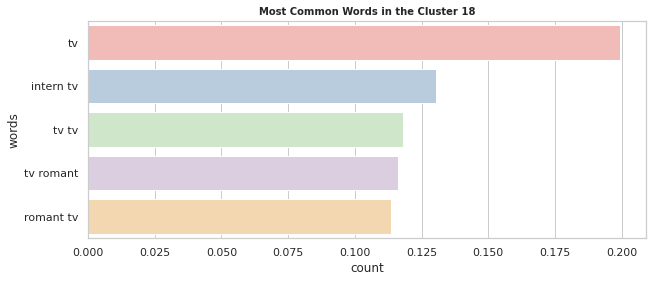

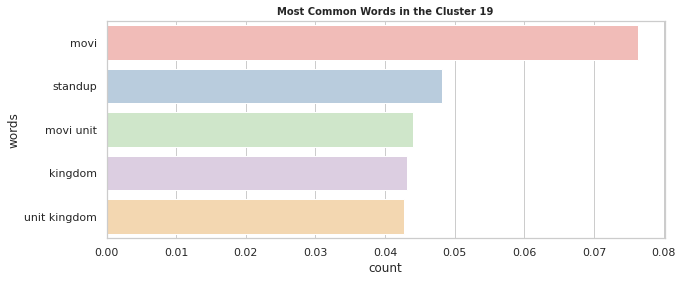

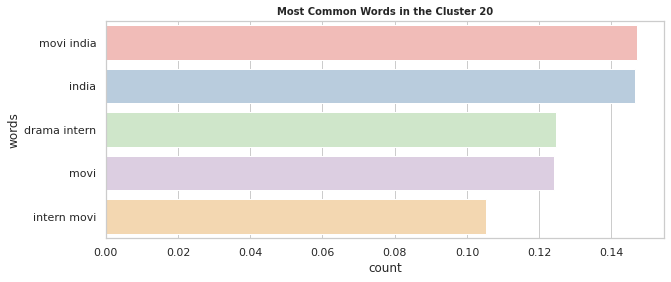

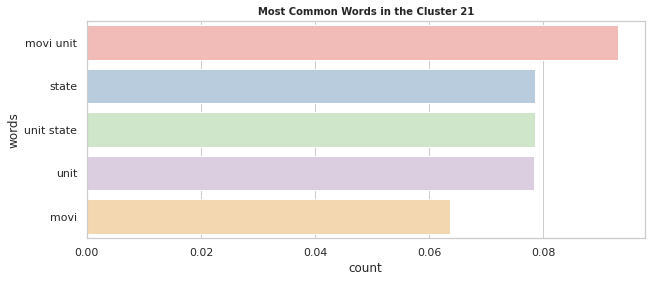

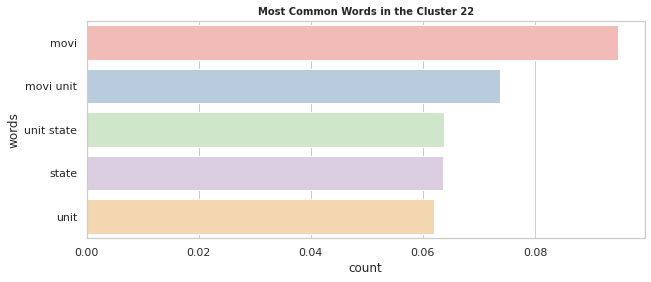

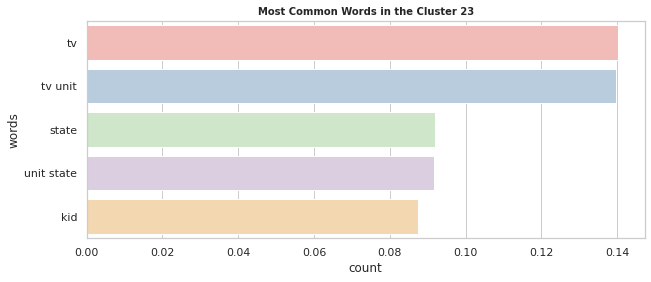

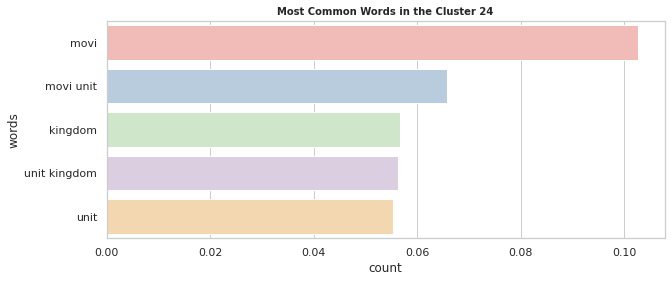

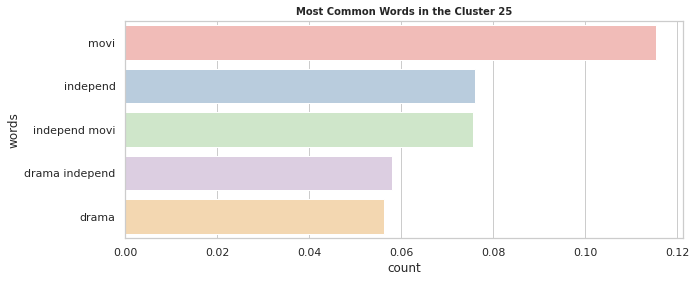

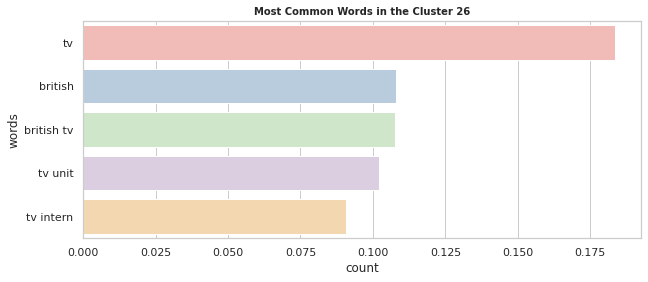

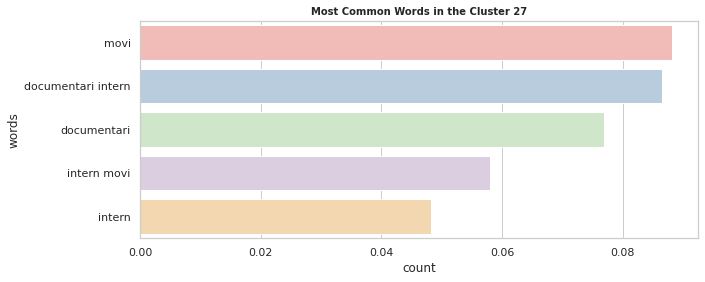

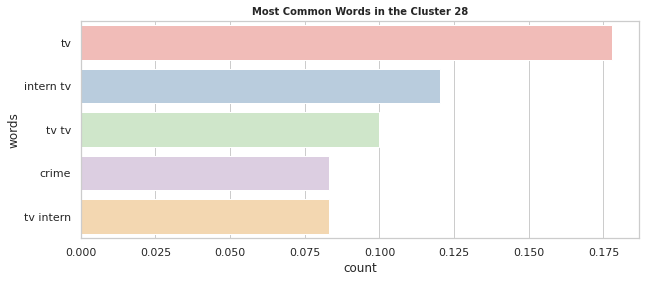

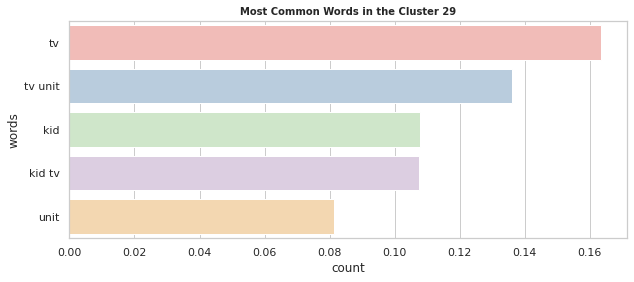

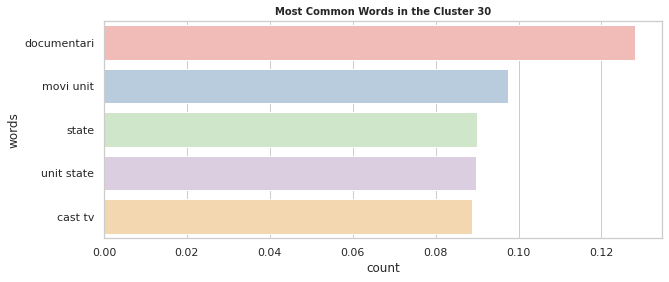

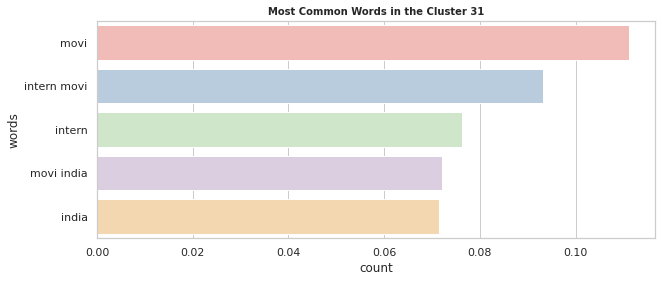

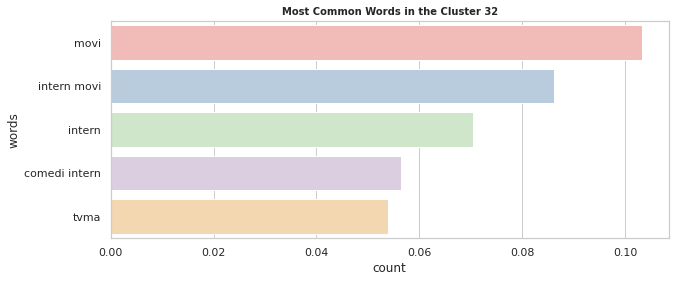

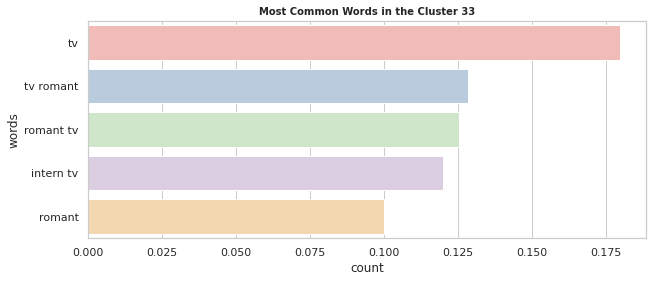

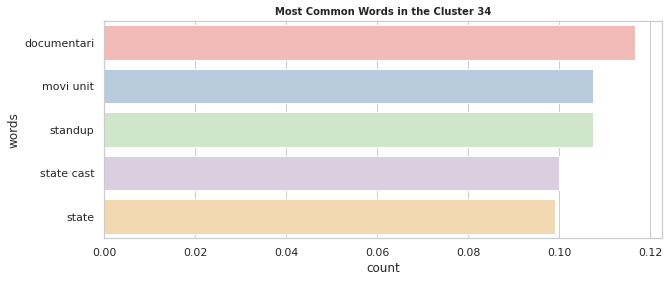

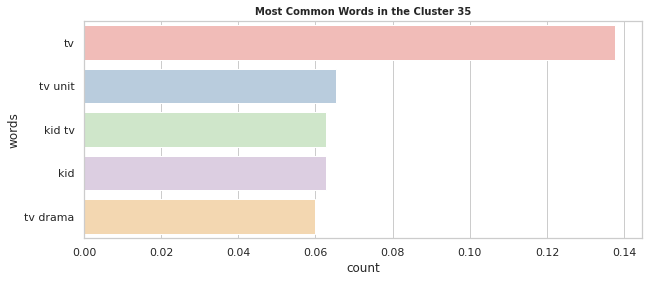

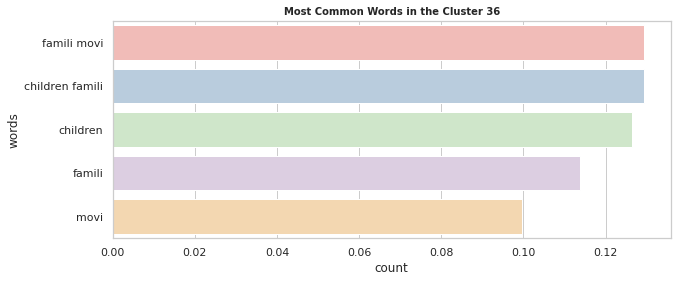

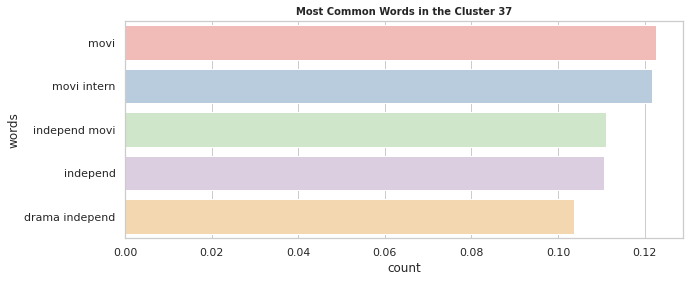

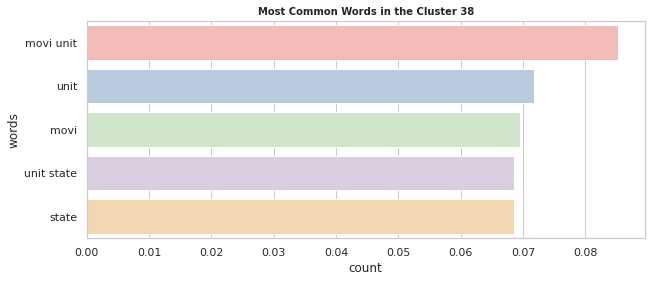

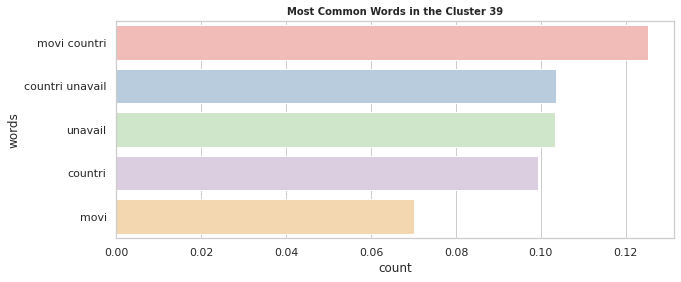

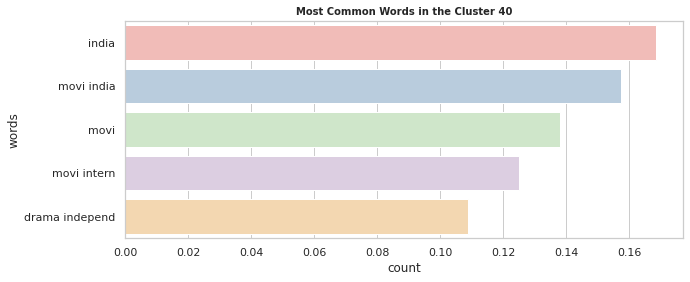

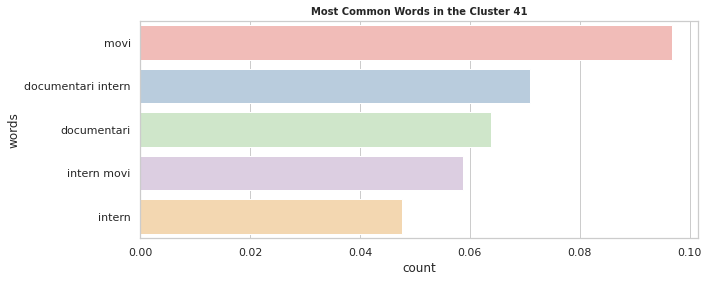

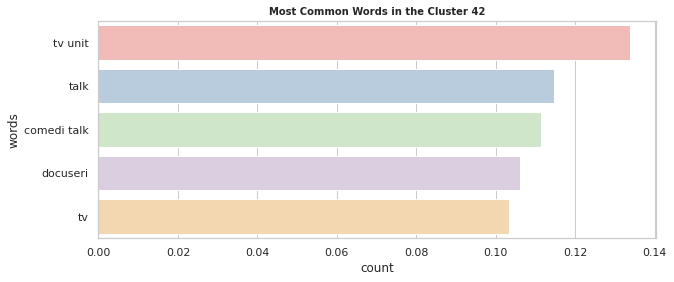

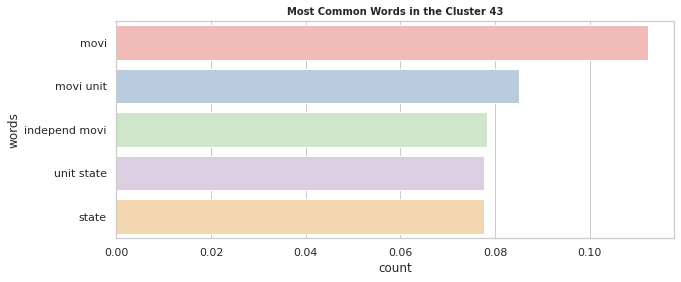

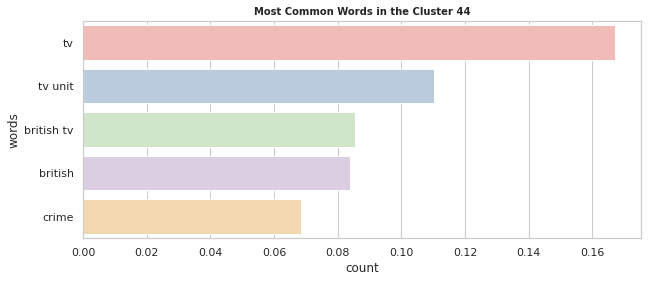

In [136]:
#Function for data visualization of the most common words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(10, 4))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'Pastel1')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [137]:
#the list of top words for each cluster is printed using string formatting
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names_out()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: aamir khan aamir
Cluster 1: aamir khan aamir
Cluster 2: aamir aamir khan
Cluster 3: aamir khan aamir
Cluster 4: aamir aamir khan
Cluster 5: aamir khan aamir
Cluster 6: aamir khan aamir
Cluster 7: aamir khan aamir
Cluster 8: aamir aamir khan
Cluster 9: aamir aamir khan
Cluster 10: aamir khan aamir
Cluster 11: aamir khan aamir
Cluster 12: aamir aamir khan
Cluster 13: aamir aamir khan
Cluster 14: aamir khan aamir
Cluster 15: aamir aamir khan
Cluster 16: aamir aamir khan
Cluster 17: aamir aamir khan
Cluster 18: aamir khan aamir
Cluster 19: aamir khan aamir
Cluster 20: aamir aamir khan
Cluster 21: aamir aamir khan
Cluster 22: aamir khan aamir
Cluster 23: aamir khan aamir
Cluster 24: aamir khan aamir
Cluster 25: aamir khan aamir
Cluster 26: aamir khan aamir
Cluster 27: aamir aamir khan
Cluster 28: aamir khan aamir
Cluster 29: aamir khan aamir
Cluster 30: aamir khan aamir
Cluster 31: aamir aamir khan
Cluster 32: aamir aamir khan
Cluster 33: aamir aamir khan
Cluster 34: aamir khan a

In [138]:
nf['cluster'] = kmeans.labels_
nf.head()

show_id     type  title           director           cast        country  \
0      s1  TV Show     3%        No Director    João Miguel         Brazil   
1      s2    Movie   7:19  Jorge Michel Grau  Demián Bichir         Mexico   
2      s3    Movie  23:59       Gilbert Chan      Tedd Chan      Singapore   
3      s4    Movie      9        Shane Acker    Elijah Wood  United States   
4      s5    Movie     21     Robert Luketic   Jim Sturgess  United States   

          date_added  release_year rating   duration  ... year_added  \
0    August 14, 2020          2020  TV-MA  4 Seasons  ...       2020   
1  December 23, 2016          2016  TV-MA     93 min  ...       2016   
2  December 20, 2018          2011      R     78 min  ...       2018   
3  November 16, 2017          2009  PG-13     80 min  ...       2017   
4    January 1, 2020          2008  PG-13    123 min  ...       2020   

  month_added  Movie Release type  \
0           8                 New   
1          12                 New   
2          12  Early 21st century   
3          11  Early 21st century   
4           1  Early 21st century   

                                  combined_text_feat  \
0  intern tv show tv drama tv scifi fantasi futur...   
1  drama intern movi devast earthquak hit meico c...   
2  horror movi intern movi armi recruit found dea...   
3  action adventur independ movi scifi fantasi po...   
4  drama brilliant group student becom cardcount ...   

                                            filtered  \
0  in a future where the elite inhabit an island ...   
1  after a devastating earthquake hits mexico cit...   
2  when an army recruit is found dead his fellow ...   
3  in a postapocalyptic world ragdoll robots hide...   
4  a brilliant group of students become cardcount...   

                                        filtered_new Length(description)  \
0  futur elit inhabit island paradis far crowd sl...                 125   
1  devast earthquak hit mexico citi trap survivor...                 123   
2  armi recruit found dead fellow soldier forc co...                 132   
3  postapocalypt world ragdol robot hide fear dan...                 126   
4  brilliant group student becom cardcount expert...                 126   

  Length(genres)  Cluster Label  cluster  
0             40             34        8  
1             17             41       32  
2             23              9       32  
3             43              7        7  
4              5             39       38  

[5 rows x 22 columns]

In [139]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = nf.loc[nf['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = nf.loc[(nf['cluster'] == num) & (nf['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [140]:
find_same_cluster_items('zodiac')

The cluster number is 19


['Inconceivable',
 'Anon',
 'Home Is Where the Killer Is',
 'To All the Boys: P.S. I Still Love You',
 'Rounders',
 'Yo-Kai Watch: The Movie',
 'Trainspotting',
 'Good Kill',
 'Dieter Nuhr: Nuhr in Berlin',
 'Theater of Life']

In [141]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 20


['Kajraare',
 'Veerey Ki Wedding',
 'Malaal',
 'Mohenjo Daro',
 'Tamasha',
 'Chicken Kokkachi',
 'Darra',
 'Dil Chahta Hai',
 'Interrogation',
 'Raja Natwarlal']

# **RECOMMENDATION**

In [142]:
# Retain top 3 actors/actresses of each film
netflix_cast3 = netflix.copy()
netflix_cast3.fillna('N/A', inplace=True)
netflix_cast3.cast = netflix_cast3.cast.str.split(', ').tolist()

for x in range(len(netflix_cast3)):
    netflix_cast3['cast'][x] = netflix_cast3['cast'][x][:3]
    x += 1
    
netflix_cast3['cast'] = netflix_cast3['cast'].agg(lambda x: ', '.join(map(str, x)))

In [143]:
# Drop unnecessary columns
drop_netflix = netflix_cast3.drop(['type','director','country','rating'], axis=1)

# Rename remaining columns
flix_df = drop_netflix.rename(columns={'title':'Title','listed_in':'Genre','cast':'Cast','description':'Description', 
                                       'cluster':'Group'})

flix_df

show_id                                    Title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                 Cast          date_added  \
0         João Miguel, Bianca Comparato, Michel Gomes     August 14, 2020   
1        Demián Bichir, Héctor Bonilla, Oscar Serrano   December 23, 2016   
2                 Tedd Chan, Stella Chung, Henley Hii   December 20, 2018   
3      Elijah Wood, John C. Reilly, Jennifer Connelly   November 16, 2017   
4           Jim Sturgess, Kevin Spacey, Kate Bosworth     January 1, 2020   
...                                               ...                 ...   
7782        Imad Creidi, Antoinette Turk, Elias Gergi    October 19, 2020   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana       March 2, 2019   
7784                                          Nasty C  September 25, 2020   
7785                       Adriano Zumbo, Rachel Khoo    October 31, 2020   
7786                                              N/A       March 1, 2020   

      release_year   duration  \
0             2020  4 Seasons   
1             2016     93 min   
2             2011     78 min   
3             2009     80 min   
4             2008    123 min   
...            ...        ...   
7782          2005     99 min   
7783          2015    111 min   
7784          2019     44 min   
7785          2019   1 Season   
7786          2019     90 min   

                                                  Genre  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            Description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
...                                                 ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[7787 rows x 8 columns]

In [144]:
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.5 MB/s eta 0:00:00


In [145]:
!pip install jupyter-dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.9 MB/s eta 0:00:00


In [146]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 10.3 MB/s eta 0:00:00


In [147]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [148]:
netflix = pd.read_csv('/content/drive/MyDrive/MLCap3/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv').drop(['show_id','date_added','release_year','duration'], axis=1)

all_titles = nf['title'].unique().tolist()
all_titles.sort()

In [149]:
feature_reduced_df = netflix.copy()
feature_reduced_df.head()

type  title           director  \
0  TV Show     3%                NaN   
1    Movie   7:19  Jorge Michel Grau   
2    Movie  23:59       Gilbert Chan   
3    Movie      9        Shane Acker   
4    Movie     21     Robert Luketic   

                                                cast        country rating  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil  TV-MA   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico  TV-MA   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore      R   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States  PG-13   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States  PG-13   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [150]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = feature_reduced_df.join(pd.DataFrame(mlb.fit_transform(feature_reduced_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=feature_reduced_df.index))

In [151]:
# Array of all unique directors, cast members, countries, ratings, and genres
all_directors = netflix['director'].explode().unique()
all_cast = netflix['cast'].explode().unique()
all_countries = netflix['country'].explode().unique()
all_ratings = netflix['rating'].unique()
all_genres = netflix['listed_in'].explode().unique()

len(all_directors), len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(4050, 6832, 682, 15, 492)

In [152]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index


In [153]:
import category_encoders as ce

# Create the count encoder
count_enc = ce.CountEncoder()

# Count encode director, cast, and country columns
count_encoded = count_enc.fit_transform(mlb_df[['director','cast','country']])

# Rename the columns with the _count suffix, and join to dataframe
netflix_encoded_df = mlb_df.join(count_encoded.add_suffix("_count"))

In [154]:
netflix_encoded_df = netflix_encoded_df.drop(['type','title','director','cast','country','rating','description'], axis=1)
netflix_encoded_df.head()

&  '  ,  -  A  B  C  D  F  ...  r  s  t  u  v  w  y  director_count  \
0  1  1  0  1  1  0  0  0  1  1  ...  1  1  1  0  0  1  1            2389   
1  1  0  0  1  0  0  0  0  1  0  ...  1  1  1  0  1  0  0               1   
2  1  0  0  1  0  0  0  0  0  0  ...  1  1  1  0  1  0  0               1   
3  1  1  0  1  1  1  0  0  0  1  ...  1  1  1  1  1  0  1               1   
4  0  0  0  0  0  0  0  0  1  0  ...  1  1  0  0  0  0  0               4   

   cast_count  country_count  
0           1             72  
1           1            100  
2           1             23  
3           1           2555  
4           1           2555  

[5 rows x 46 columns]

In [155]:
# Create K-Means Model
modelkmeans = KMeans(n_clusters=500, init='k-means++', n_init=10).fit(netflix_encoded_df)

# Form cluster predictions using K-Means Model
predictions = modelkmeans.predict(netflix_encoded_df)
# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

In [156]:

netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Breaking Bad'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

type                                             title director  \
64    TV Show                13 Reasons Why: Beyond the Reasons      NaN   
405   TV Show                                      All American      NaN   
457   TV Show                                    American Crime      NaN   
458   TV Show  American Crime Story: The People v. O.J. Simpson      NaN   
471   TV Show                                  American Odyssey      NaN   
...       ...                                               ...      ...   
7317  TV Show                                      Unbelievable      NaN   
7360  TV Show                                          Unsolved      NaN   
7544  TV Show                                         WHAT / IF      NaN   
7584  TV Show                                  When They See Us      NaN   
7672  TV Show                                          Wormwood      NaN   

                                                   cast        country rating  \
64    Dylan Minnette, Katherine Langford, Kate Walsh...  United States  TV-MA   
405   Daniel Ezra, Taye Diggs, Samantha Logan, Bre-Z...  United States  TV-14   
457   Felicity Huffman, Timothy Hutton, Elvis Nolasc...  United States  TV-MA   
458   Cuba Gooding Jr., Sarah Paulson, John Travolta...  United States  TV-MA   
471   Anna Friel, Peter Facinelli, Jake Robinson, Ji...  United States  TV-14   
...                                                 ...            ...    ...   
7317  Toni Collette, Merritt Wever, Kaitlyn Dever, D...  United States  TV-MA   
7360       Josh Duhamel, Jimmi Simpson, Bokeem Woodbine  United States  TV-MA   
7544  Renée Zellweger, Jane Levy, Blake Jenner, Keit...  United States  TV-MA   
7584  Asante Blackk, Caleel Harris, Ethan Herisse, J...  United States  TV-MA   
7672  Peter Sarsgaard, Molly Parker, Christian Camar...  United States  TV-14   

                       listed_in  \
64    Crime TV Shows, Docuseries   
405     TV Dramas, Teen TV Shows   
457    Crime TV Shows, TV Dramas   
458    Crime TV Shows, TV Dramas   
471      TV Dramas, TV Thrillers   
...                          ...   
7317   Crime TV Shows, TV Dramas   
7360   Crime TV Shows, TV Dramas   
7544     TV Dramas, TV Thrillers   
7584   Crime TV Shows, TV Dramas   
7672  Crime TV Shows, Docuseries   

                                            description  
64    Cast members, writers, producers and mental he...  
405   Culture clashes and brewing rivalries test a t...  
457   This anthology series unfolds a different stor...  
458   This anthology series dramatizes historic crim...  
471   An elite soldier, a corporate lawyer and a pol...  
...                                                 ...  
7317  After a young woman is accused of lying about ...  
7360  Ride along for a dramatized version of the rea...  
7544  Desperate to secure funding for her med tech s...  
7584  Five teens from Harlem become trapped in a nig...  
7672  In this genre-bending tale, Errol Morris explo...  

[71 rows x 8 columns]

In [157]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div(style={'backgroundColor': 'white'}, children = [
    html.H1("NetflixRecommender", style={'text-align': 'center', 
                                      'font-family':'trebuchet ms',
                                      'font-size':'60px',
                                      'color': 'rgb(229,9,20)',
                                      'backgroundColor': 'black',
                                      'padding':'1%',
                                      'box-shadow': '2px 5px 5px 1px rgba(255, 101, 131,0.5)'}), 
    html.H2("Favourite Movie/TV Show:", style={'text-align': 'left', 
                                               'font-family':'trebuchet ms',
                                               'font-size':'20px',
                                               'color': 'black',
                                               'padding':'1%'}),
    dcc.Dropdown(id="select_film",
                 options=[{"label": title, "value": title} for title in all_titles],
                 multi=False,
                 value="Breaking Bad",
                 style={'width': "50%", 
                        'font-size':'14px', 
                        'font-family':'trebuchet ms', 
                        'padding-left':'1%'}
                 ),
    html.Br(),
    html.Br(),
    html.H2("Recommendations", style={'text-align': 'center', 
                                       'font-family':'trebuchet ms',
                                       'font-size':'24px',
                                       'color': 'white',
                                       'backgroundColor': 'rgb(229,9,20)',
                                       'padding':'1%',
                                       'box-shadow': '2px 5px 5px 1px grey'}),
    html.Div(id='dd-output-container'),
    
])


@app.callback(
    dash.dependencies.Output('dd-output-container','children'),
    [dash.dependencies.Input('select_film','value')])

def update_output(value):
    return  dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in flix_df.columns],
        data=flix_df[netflix_pred.cluster == netflix_pred[netflix_pred.title==value].cluster.item()].to_dict('records'),
        style_header={
                    'textAlign': 'left',
                    'backgroundColor': 'rgb(229,9,20)',
                    'color': 'white',
                    'fontWeight': 'bold',
                    'font-size':'14px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_cell={
                    'textAlign': 'left',
                    'backgroundColor': 'white', 
                    'color': 'black',
                    'font-size':'13px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_data={
                    'whiteSpace': 'normal',
                    'height': 'auto'},
        style_cell_conditional=[
            {'if': {'column_id': 'Title'},
             'width': '20%'},
            {'if': {'column_id': 'Cast'},
             'width': '20%'},
            {'if': {'column_id': 'Genre'},
             'width': '20%'},
             {'if': {'column_id': 'Description'},
             'width': '20%'},
        ]
    )
# Run dashboard app
app.run_server(debug=True, use_reloader=False)

Dash app running on:


<IPython.core.display.Javascript object>

# **Conclusion**


1.The dataset contains 7787 rows and 12 columns, cast and director columns have a lot of missing values so we dropped them and we have 10 features for the further analysis.

2.We have two types of content movies and TV shows.

3.Netflix has 69% of its content as movies, so we can say that movies are clearly more popular on Netflix than TV shows.

4.For mature audience, there is much more movie content than TV shows. However, for the younger audience (under the age of 17),there are more TV shows than movies.

5.Netflix has started adding content since 2014,highest number of movies and tv shows added in the year 2019,there is consistent content addition to netflix across the year.

6.The average duration of a movie on netflix is 90 minutes.

7.With respect to available content,the United States is on the top.India is at second followed by the UK and Canada. China is not even close to the top.

8.In terms of genres, Dramas is on the top followed by Comedies and Documentaries.

9.Number of movies added to netflix is higher than that of TV shows. In 2019, netflix added 1497 movies and 656 TV shows. So there we cannot conclude that netflix has switched focus from movies to TV shows.

10.Principal component analysis was performed inorder to reduce the higher dimensionality which improved the silhouette coefficient to 0.34118.

11.Clusters are identified for each of the record in the dataset.

12.Recommendation based on cosine similiarity is done.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***